In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()
%load_ext rpy2.ipython


In [4]:
plt.rcParams["axes.grid"] = False

In [5]:
sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.0 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [6]:
import os
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/")

In [7]:
adata=sc.read_h5ad("./All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [8]:
adataPBMC=adata[adata.obs.New_Body.isin(['PBMC'])]

In [9]:
adata

AnnData object with n_obs × n_vars = 31502 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR

In [10]:
adata.obs['isotype_status'].value_counts()

IgM        30405
IgD          809
Multi        241
IgG           24
IgM/IgD       13
IgA            4
None           4
IgL            2
Name: isotype_status, dtype: int64

In [11]:
adataPBMCIGM=adataPBMC[adataPBMC.obs.isotype_status.isin(['IgM'])]

In [12]:
adataPBMCIGM

View of AnnData object with n_obs × n_vars = 19154 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [13]:

df1 = ir.tl.spectratype(adataPBMCIGM, target_col="AdjustedID",groupby='IR_VDJ_1_junction_aa')

df_sums1 = df1.sum(axis=0)
df_sums_ratio1 = df1.div(df_sums1, axis=1)
# df_sums_ratio1  = df_sums_ratio1 .loc[~(df_sums_ratio1 ==0).all(axis=1)]
# PBMC_sums_ratioIGH=df_sums_ratio1[[col for col in df_sums_ratio1 if 'B' in col] ]
df_sums_ratio1
# df1

AdjustedID  B11.6_P24  B17.4_P3  B18.0_P4  B18.6_P5  B20.9_P7  B21.7_P8  \
lengths                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.004255  0.011236  0.006024  0.002600  0.006296  0.002853   
8            0.007447  0.000000  0.007745  0.005720  0.007345  0.004280   
9            0.027660  0.011236  0.016351  0.010400  0.009444  0.015692   
10           0.032979  0.022472  0.024096  0.019241  0.035677  0.035663   
11           0.077660  0.033708  0.054217  0.049402  0.051417  0.048502   
12           0.095745  0.067416  0.110155  0.065003  0.077650  0.059914   
13           0.125532  0.224719  0.140275  0.107644  0.133263  0.142653   
14           0.147872  0.123596  0.148021  0.143006  0.147954  0.128388   
15           0.132979  0.101124  0.120482  0.140406  0.142707  0.144080   
16           0.120213  0.146067  0.129088  0.125325  0.116474  0.118402   
17           0.081915  0.056180  0.097246  0.102964  0.102833  0.106990   
18           0.060638  0.078652  0.058520  0.068643  0.074502  0.055635   
19           0.047872  0.078652  0.035284  0.061882  0.043022  0.038516   
20           0.019149  0.011236  0.021515  0.031721  0.019937  0.032810   
21           0.008511  0.022472  0.014630  0.028601  0.017838  0.034237   
22           0.002128  0.011236  0.012048  0.013521  0.006296  0.012839   
23           0.003191  0.000000  0.000861  0.010400  0.003148  0.008559   
24           0.001064  0.000000  0.000861  0.006760  0.003148  0.007133   
25           0.001064  0.000000  0.001721  0.004680  0.000000  0.001427   
26           0.001064  0.000000  0.000000  0.000000  0.000000  0.001427   
27           0.000000  0.000000  0.000861  0.001040  0.000000  0.000000   
28           0.001064  0.000000  0.000000  0.000520  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
31           0.000000  0.000000  0.000000  0.000520  0.000000  0.000000   
32           0.000000  0.000000  0.000000  0.000000  0.001049  0.000000   
33           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

AdjustedID  B22.4_P9  B22.4_P23  B23.4_P10  B24.6_P11  ...  B29.1_P13  \
lengths                                                ...              
0           0.000000   0.000000   0.000000   0.000000  ...   0.000000   
1           0.000000   0.000000   0.000000   0.000000  ...   0.000000   
2           0.000000   0.000000   0.000000   0.000000  ...   0.000000   
3           0.000000   0.000000   0.000000   0.000000  ...   0.000000   
4           0.000000   0.000000   0.000000   0.000000  ...   0.000000   
5           0.000000   0.000000   0.000000   0.000000  ...   0.000000   
6           0.000000   0.000000   0.000000   0.000000  ...   0.000000   
7           0.008000   0.000885   0.007752   0.000000  ...   0.002146   
8           0.013333   0.007965   0.014535   0.011161  ...   0.008584   
9           0.010667   0.007965   0.009690   0.024554  ...   0.012876   
10          0.016000   0.022124   0.011628   0.011161  ...   0.023605   
11          0.034667   0.033628   0.039729   0.044

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


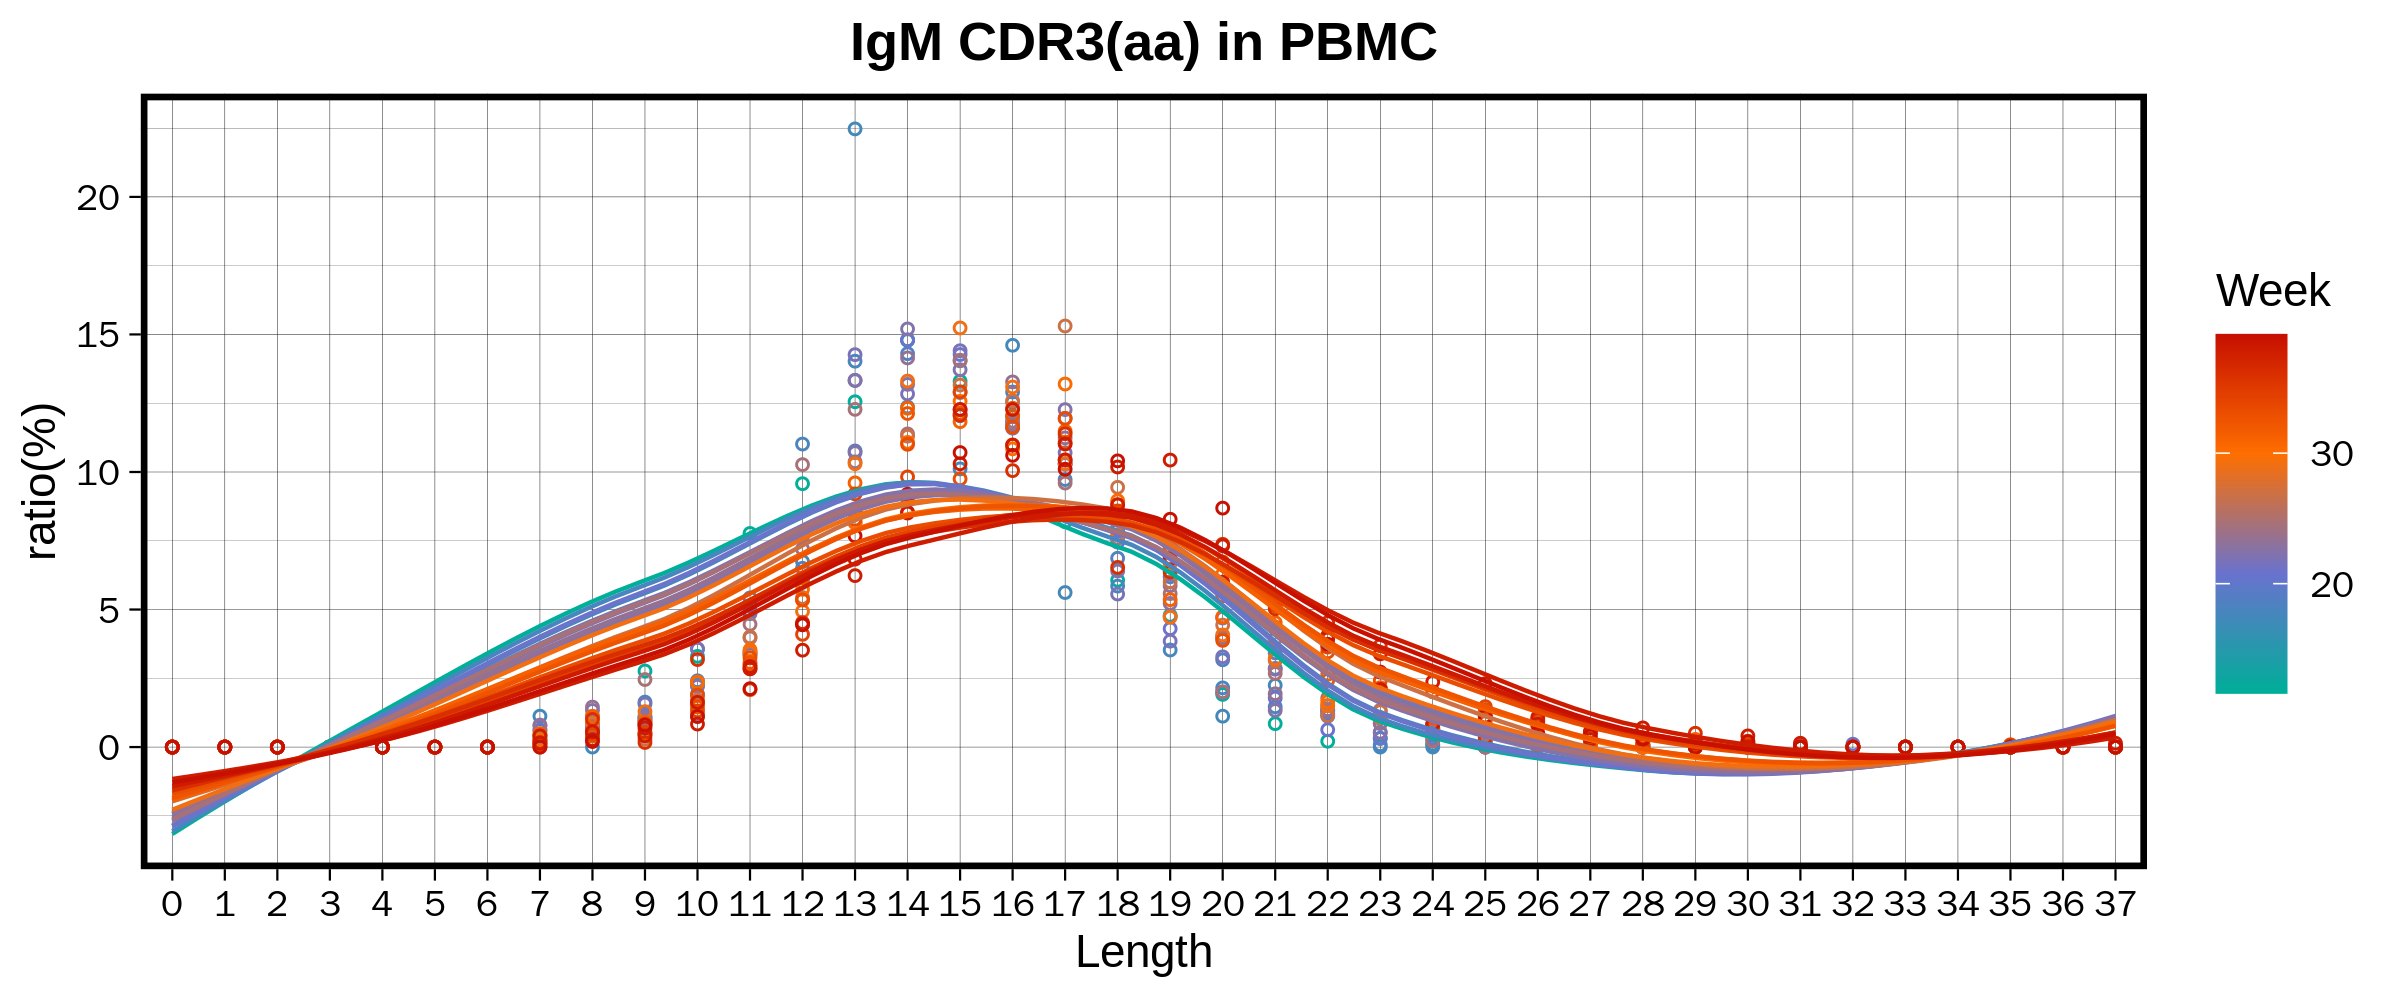

In [14]:
%%R -w 2400 -h 1000 -r 300 -i df_sums_ratio1
library(tidyverse)
library(reshape2)
library(ggplot2)
library(dplyr)
library(RColorBrewer )
plot_PBMC_sum_ratio <- function(PBMC_sums_ratio, plot_title = 'BCR IGH CDR3(aa) in PBMC') {
  PBMC_sum_ratio <- rownames_to_column(PBMC_sums_ratio)
  PBMC_sum_ratio <- melt(PBMC_sum_ratio, id = c("rowname"))
  PBMC_sum_ratio$rowname <- factor(PBMC_sum_ratio$rowname, level = unique(PBMC_sum_ratio$rowname))

  colnames(PBMC_sum_ratio) <- c('Length', 'Sample', 'ratio')
  PBMC_sum_ratio$ratio <- PBMC_sum_ratio$ratio * 100
  
 PBMC_sum_ratio$Week <- as.numeric(substring(PBMC_sum_ratio$Sample,2,5))

p <- ggplot(PBMC_sum_ratio, aes(Length, ratio, color = Week, group=Sample)) +
  geom_point(shape=1,size=1) +
  geom_smooth(se=F,size=0.5) +
  ggtitle(plot_title) +
  theme_linedraw() +
  xlab('Length') +
  ylab('ratio(%)') +
  theme(plot.title = element_text(hjust = 0.5, size = 13, face = "bold"),
        panel.border = element_rect(linetype = "solid", colour = "black", size = 1.5)) 

print(p)

  return(p)
}
my_plot <- plot_PBMC_sum_ratio(df_sums_ratio1, plot_title = 'IgM CDR3(aa) in PBMC')+
scale_color_gradientn(colours = rev(colorRampPalette(c("#C71000B2","#FF6F00B2","#6a73cf","#00AF99" ))(100)))
# scale_color_gradientn(colours = rev(colorRampPalette(brewer.pal(9, "Spectral"))(100)))
print(my_plot)

In [15]:
adataPBMC=adata[adata.obs.New_Body.isin(["PBMC"])]
adataPBMC=adataPBMC

In [16]:
mkdir -p /data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdataIGL/

In [17]:
ls /data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdata/

ls: 无法访问/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdata/: 没有那个文件或目录


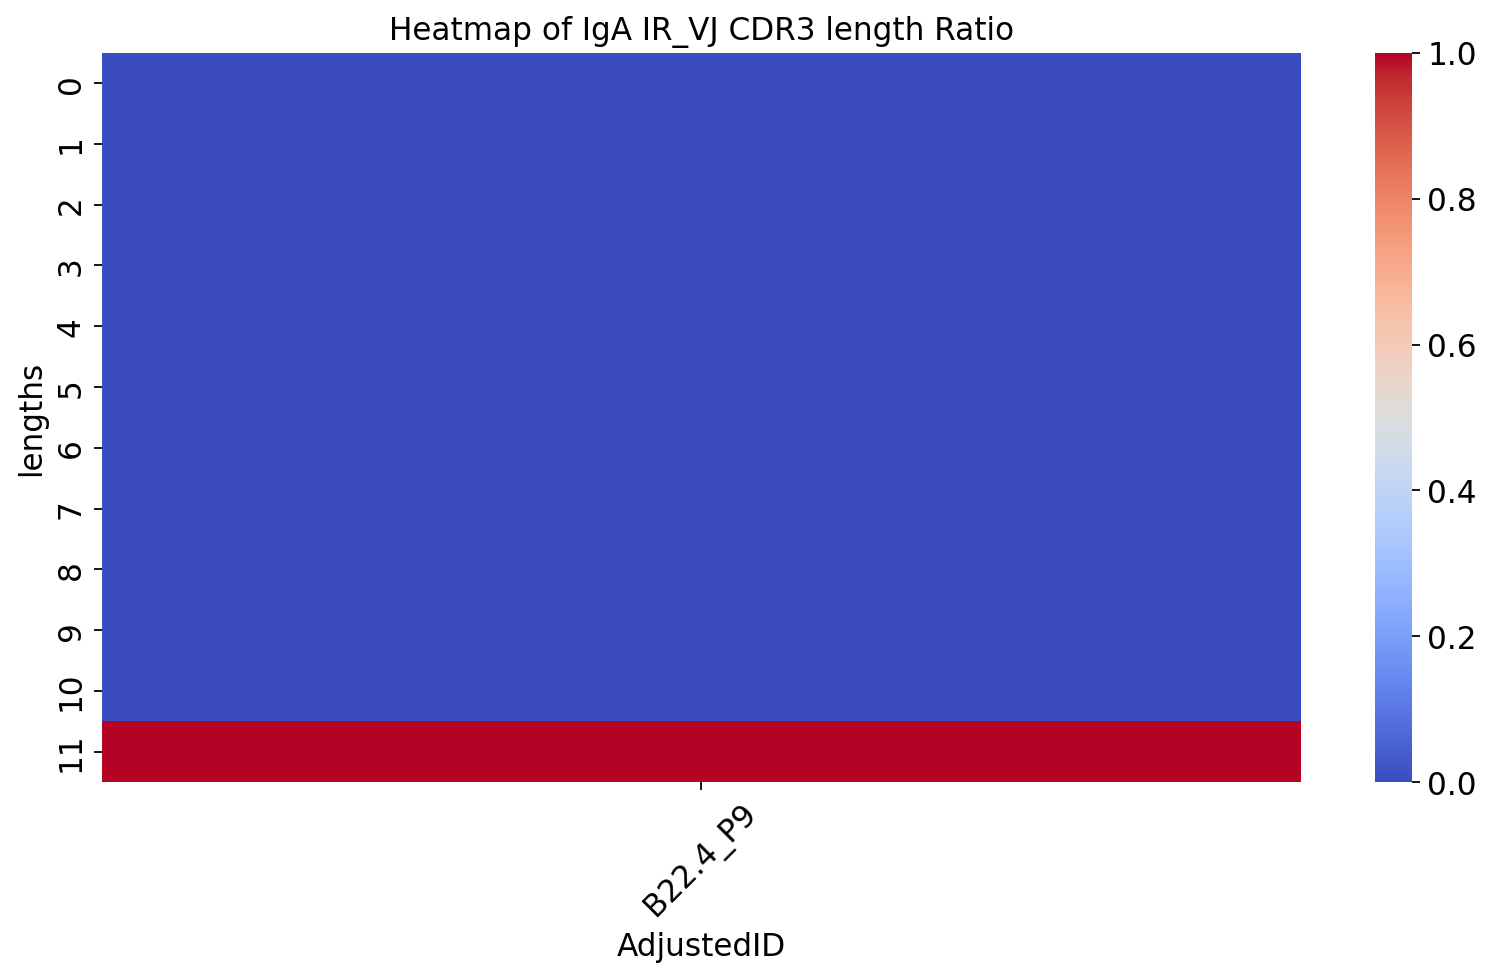

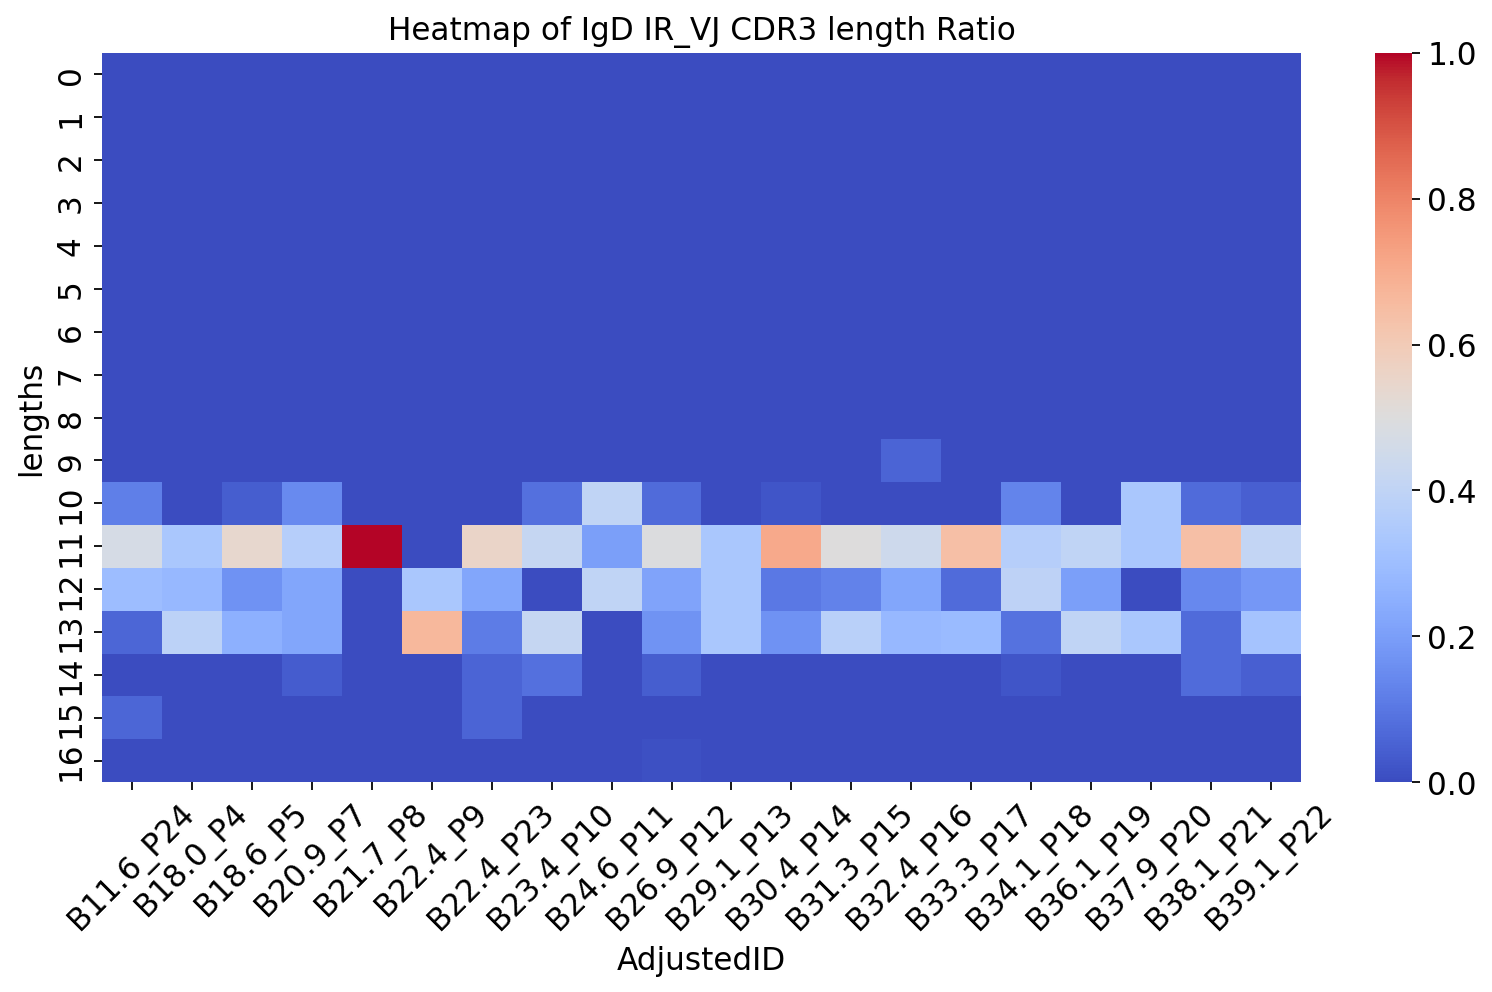

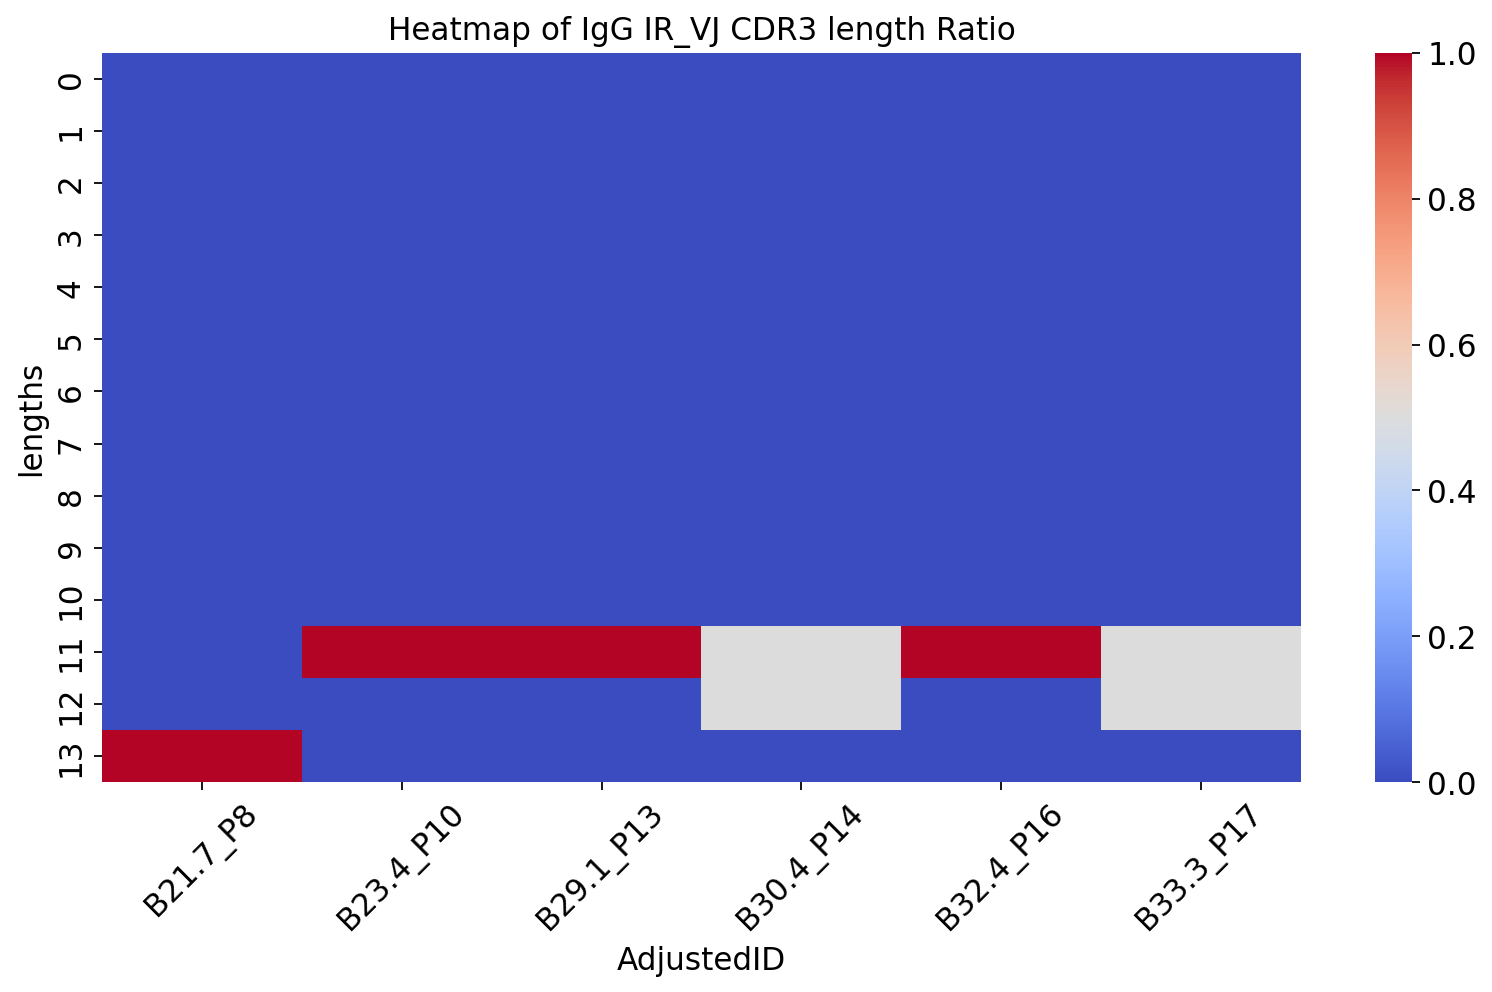

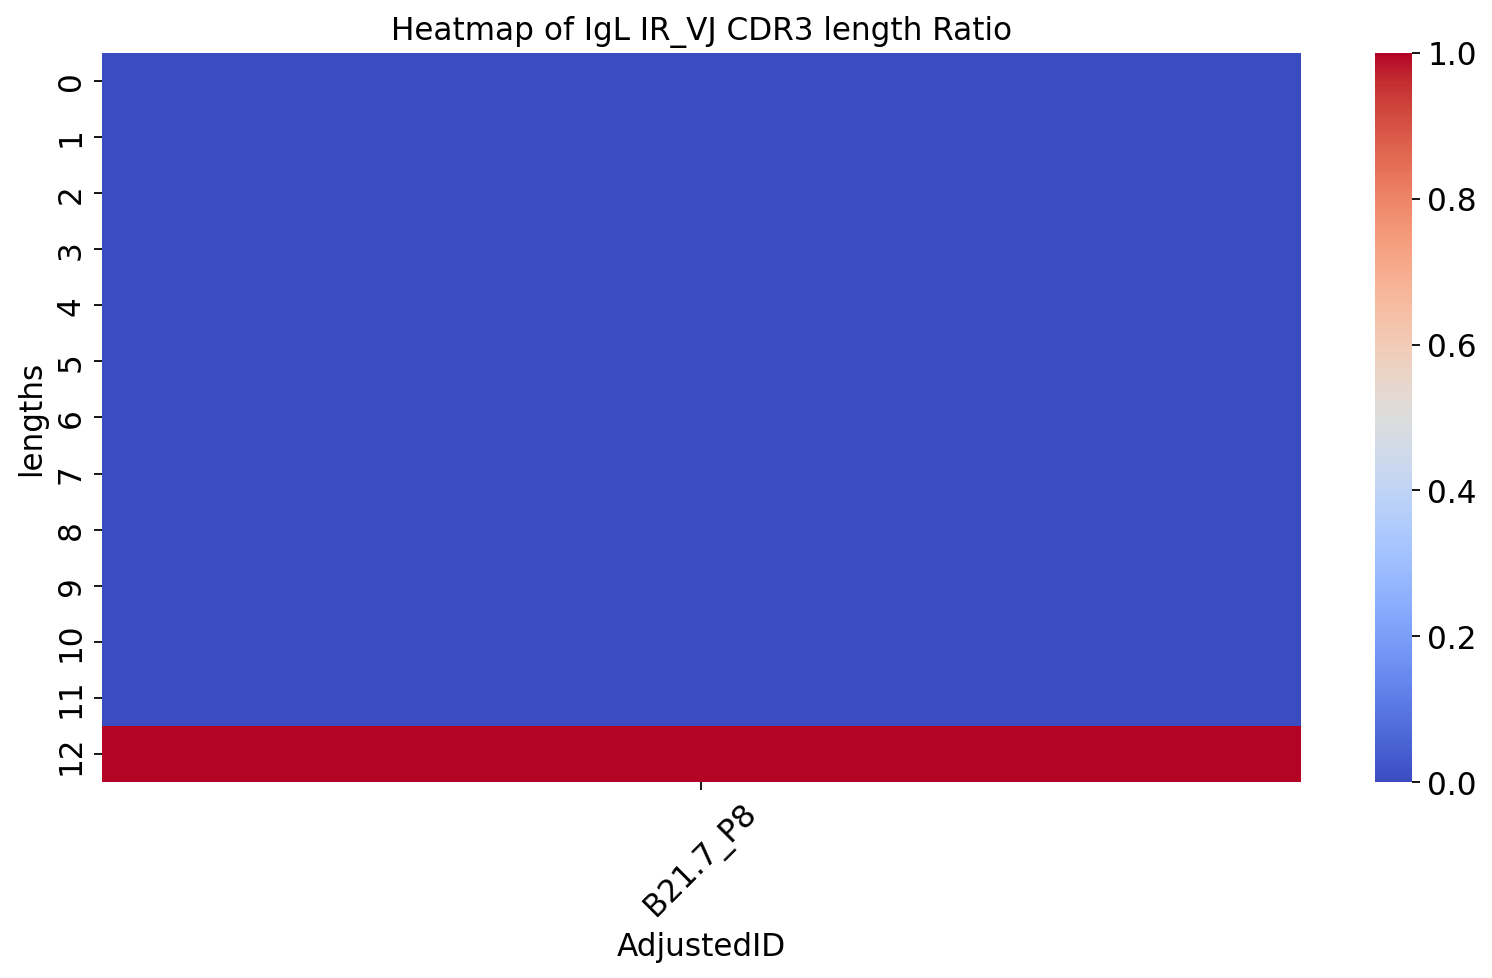

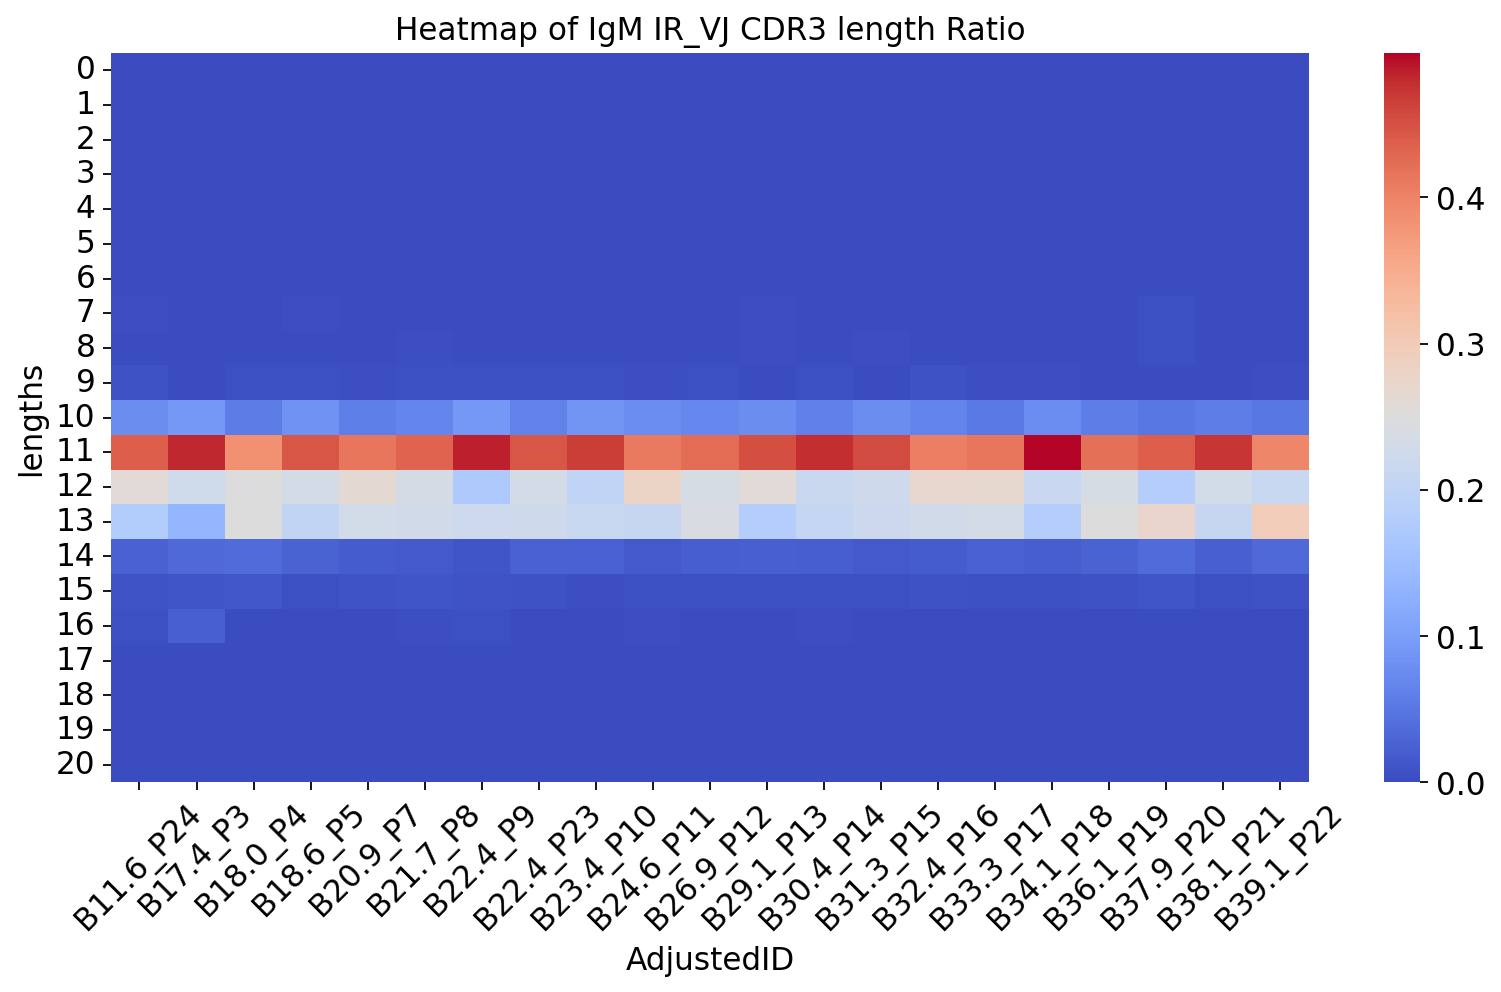

In [18]:
import anndata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scirpy as ir

# def BCR_All_plot_heatmap(adata,col='IR_VDJ_1_junction_aa',title='BCR all',groupSample="AdjustedID"):
#     filtered_adata=adata
#     df = ir.tl.spectratype(filtered_adata, target_col=groupSample,groupby=col)

def BCR_plot_heatmap_cell_type(adata, cell_type,groupcell='Last_cell_type',col='IR_VDJ_1_junction_aa',title='BCR all',groupSample="AdjustedID"):
    filtered_adata = adata[adata.obs[groupcell] == cell_type]
    df = ir.tl.spectratype(filtered_adata, target_col=groupSample,groupby=col)

    df_sums = df.sum(axis=0)
    df_sums_ratio = df.div(df_sums, axis=1)

    plt.figure(figsize=(12, 6))
    sns.heatmap(df_sums_ratio, xticklabels=True, cmap='coolwarm')
    plt.title(f'Heatmap of {cell_type} IR_VJ CDR3 length Ratio')
    plt.xticks(rotation=45)  
    plt.show()
    return df_sums_ratio

unique_cell_types = ['IgA', 'IgD', 'IgG', 'IgL', 'IgM']

# for cell_type in unique_cell_types:
#     BCR_plot_heatmap(adataPBMC, cell_type)

for cell_type in unique_cell_types:
    cellratio=BCR_plot_heatmap_cell_type(adataPBMC, cell_type,groupcell='isotype_status',col='IR_VJ_1_junction_aa')
    cellratio.to_csv('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdataIGL/PBMC_'+cell_type+'_ratio.csv')

In [23]:

mkdir -p /data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdata

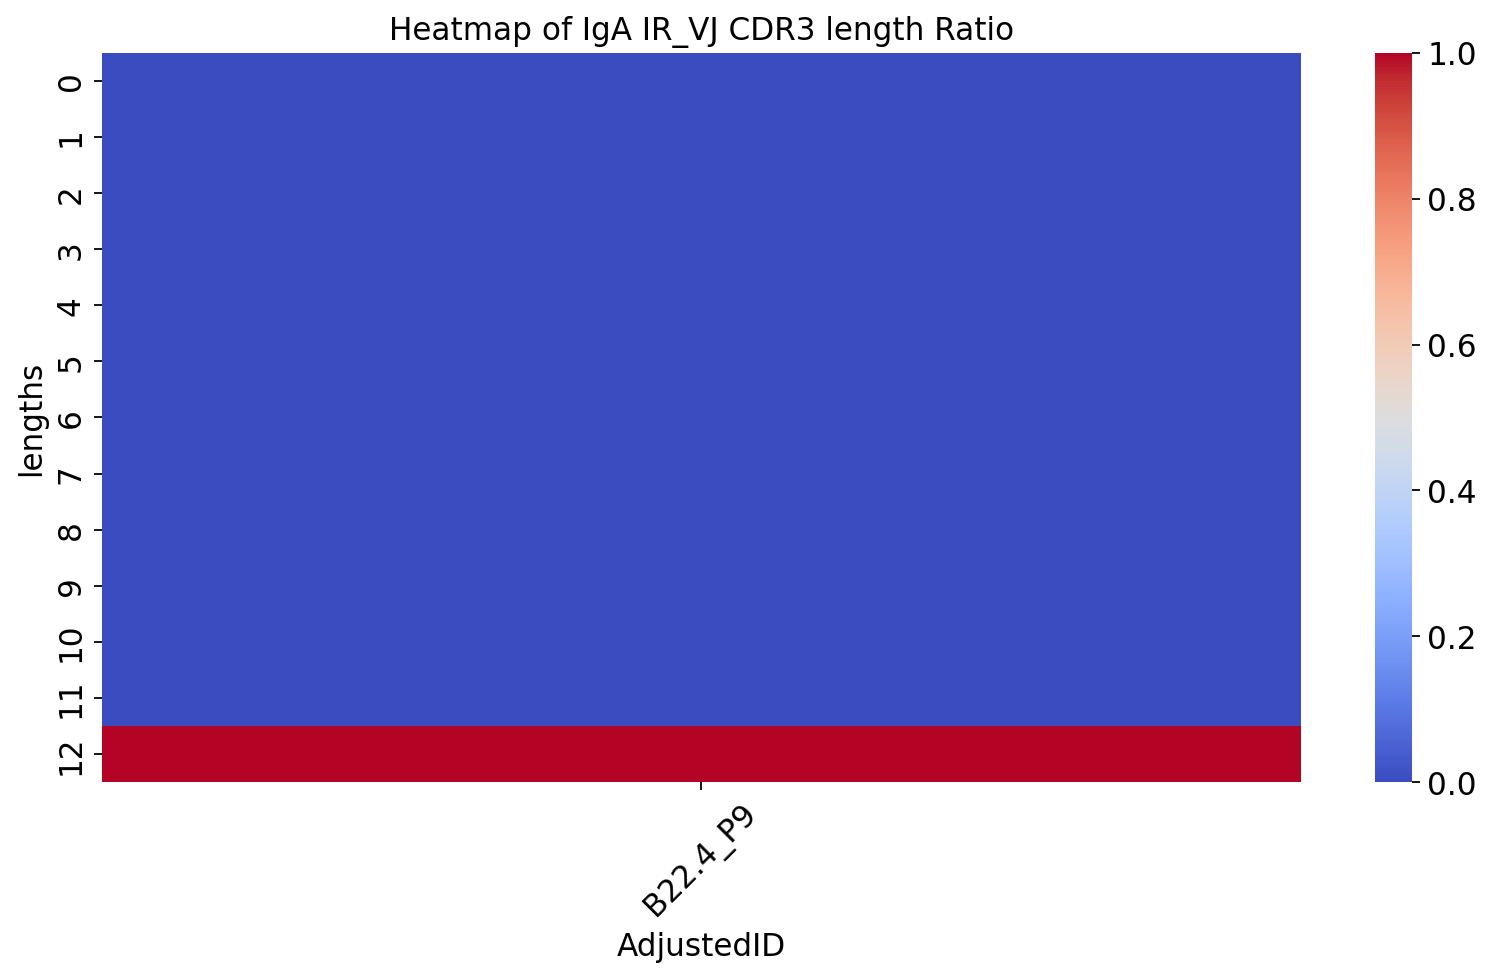

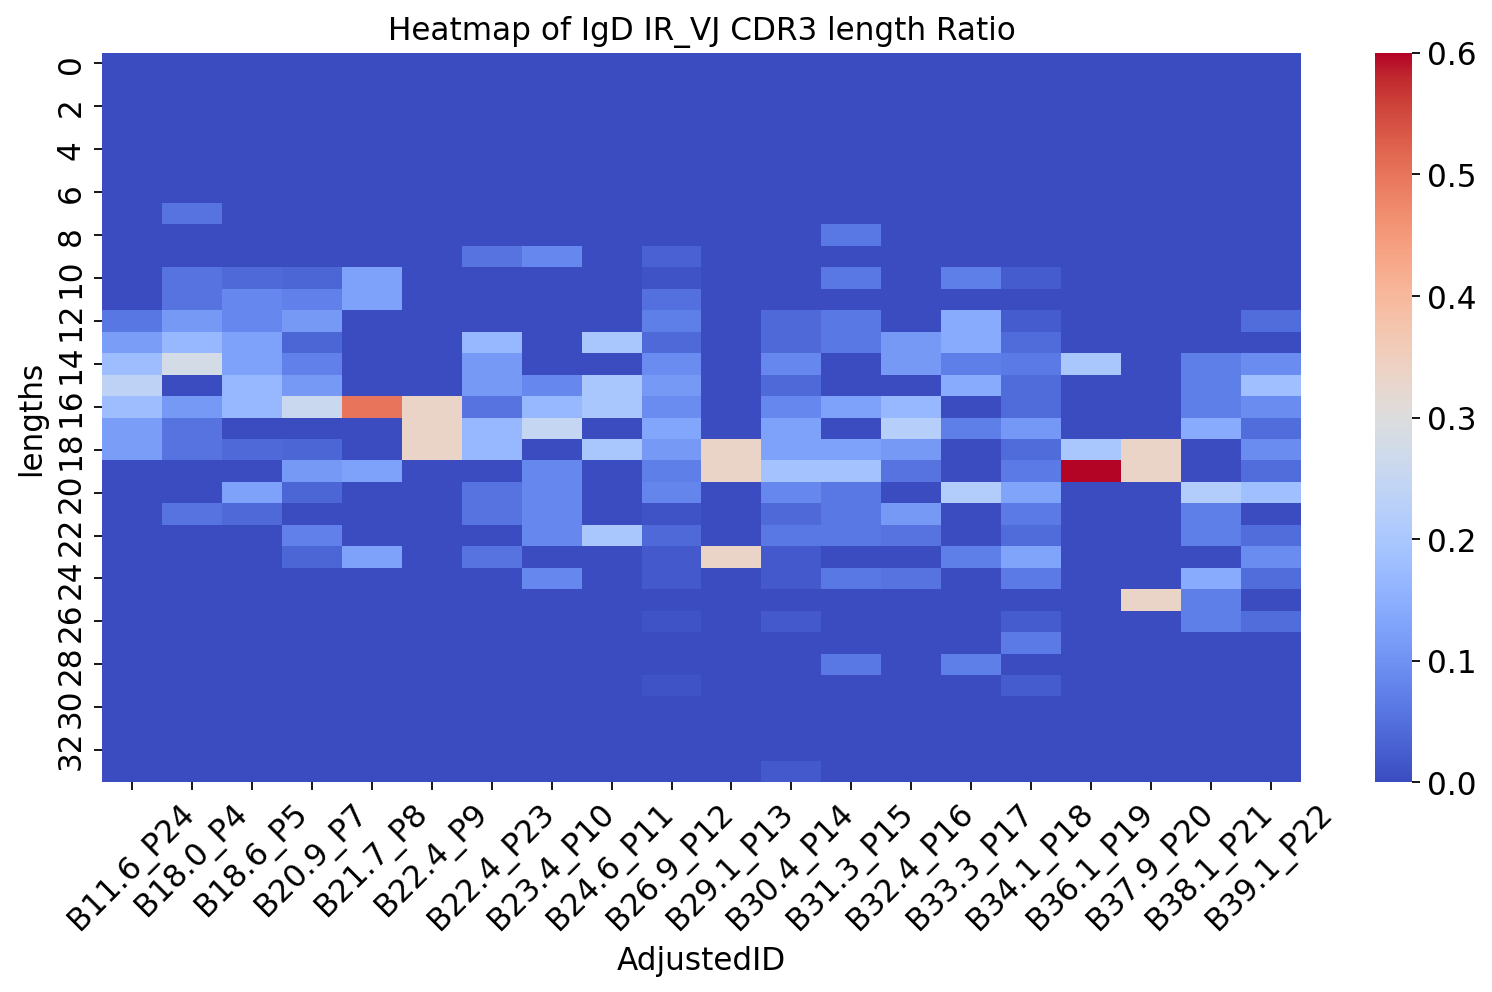

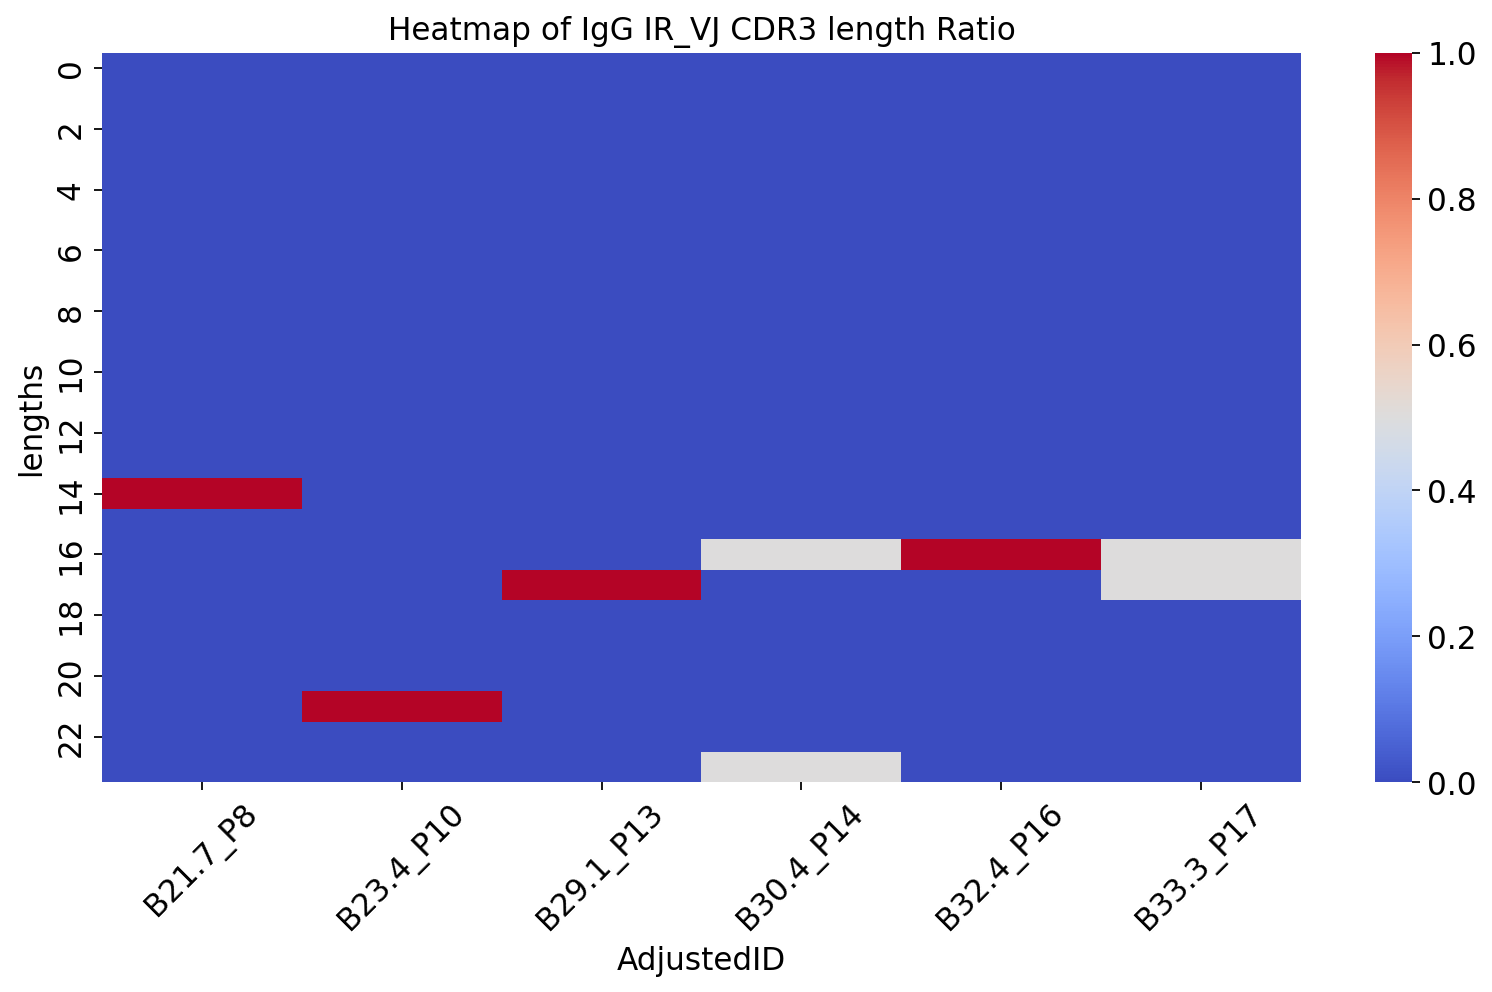

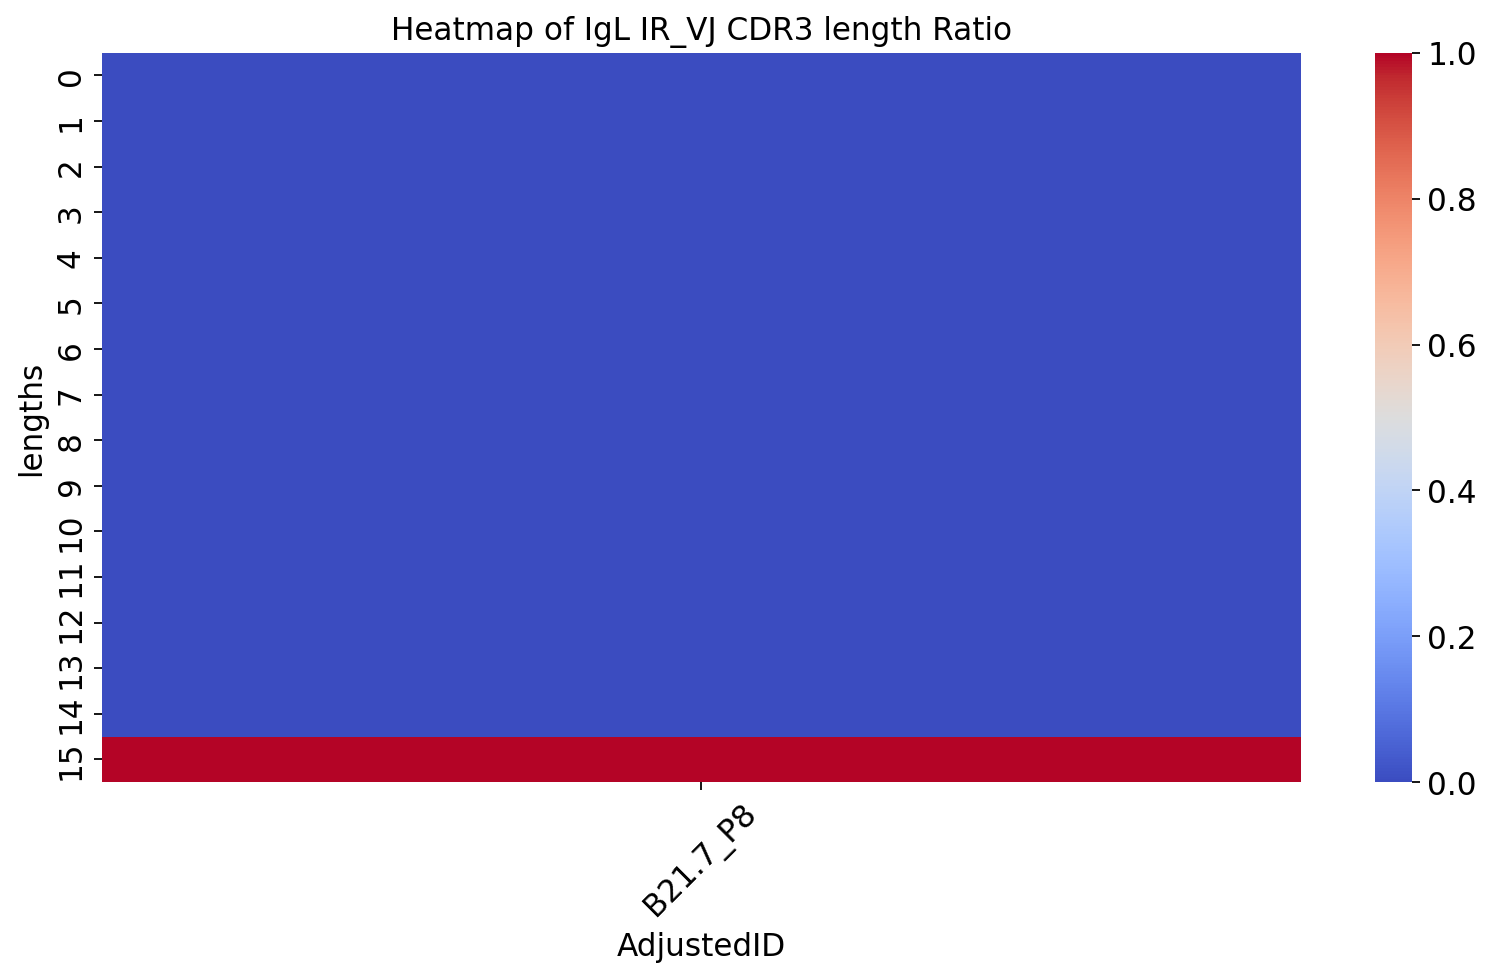

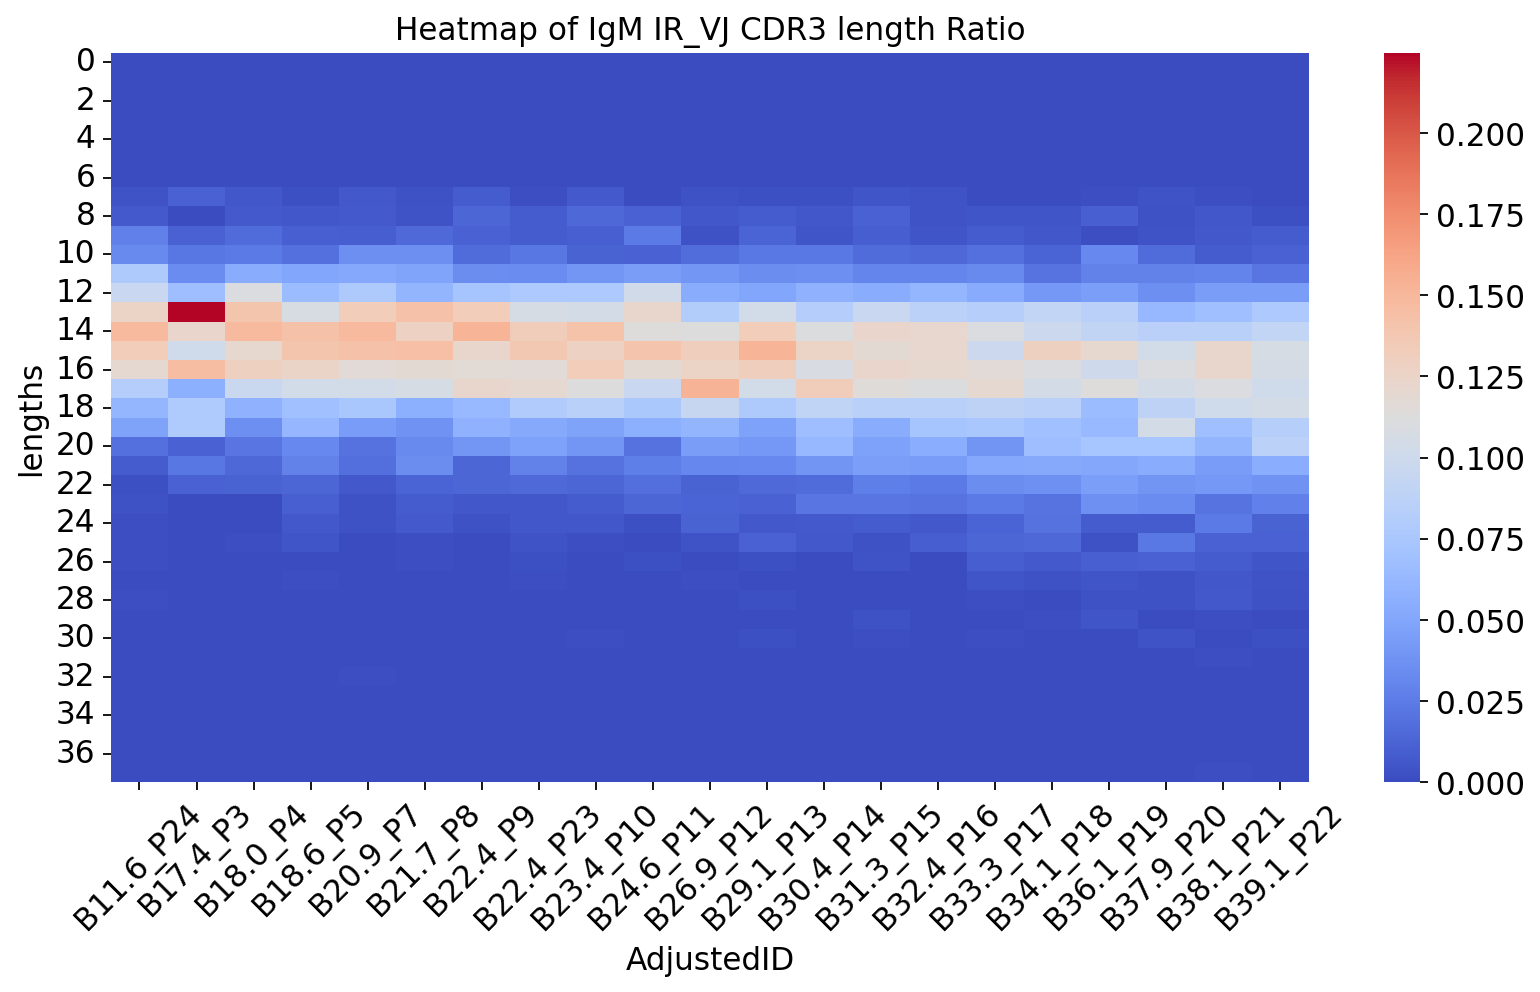

In [24]:
import anndata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scirpy as ir

# def BCR_All_plot_heatmap(adata,col='IR_VDJ_1_junction_aa',title='BCR all',groupSample="AdjustedID"):
#     filtered_adata=adata
#     df = ir.tl.spectratype(filtered_adata, target_col=groupSample,groupby=col)

def BCR_plot_heatmap_cell_type(adata, cell_type,groupcell='Last_cell_type',col='IR_VDJ_1_junction_aa',title='BCR all',groupSample="AdjustedID"):
    filtered_adata = adata[adata.obs[groupcell] == cell_type]
    df = ir.tl.spectratype(filtered_adata, target_col=groupSample,groupby=col)

    df_sums = df.sum(axis=0)
    df_sums_ratio = df.div(df_sums, axis=1)

    plt.figure(figsize=(12, 6))
    sns.heatmap(df_sums_ratio, xticklabels=True, cmap='coolwarm')
    plt.title(f'Heatmap of {cell_type} IR_VJ CDR3 length Ratio')
    plt.xticks(rotation=45)  
    plt.show()
    return df_sums_ratio

unique_cell_types = ['IgA', 'IgD', 'IgG', 'IgL', 'IgM']

# for cell_type in unique_cell_types:
#     BCR_plot_heatmap(adataPBMC, cell_type)

for cell_type in unique_cell_types:
    cellratio=BCR_plot_heatmap_cell_type(adataPBMC, cell_type,groupcell='isotype_status',col='IR_VDJ_1_junction_aa')
    cellratio.to_csv('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdata/PBMC_'+cell_type+'_ratio.csv')

In [25]:
ls /data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdataIGL

PBMC_IgA_ratio.csv  PBMC_IgG_ratio.csv  PBMC_IgM_ratio.csv
PBMC_IgD_ratio.csv  PBMC_IgL_ratio.csv


In [29]:
%%R
source('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/Mainrun.R')

[1] "PBMC_IgA_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgG_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgL_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgD_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgM_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


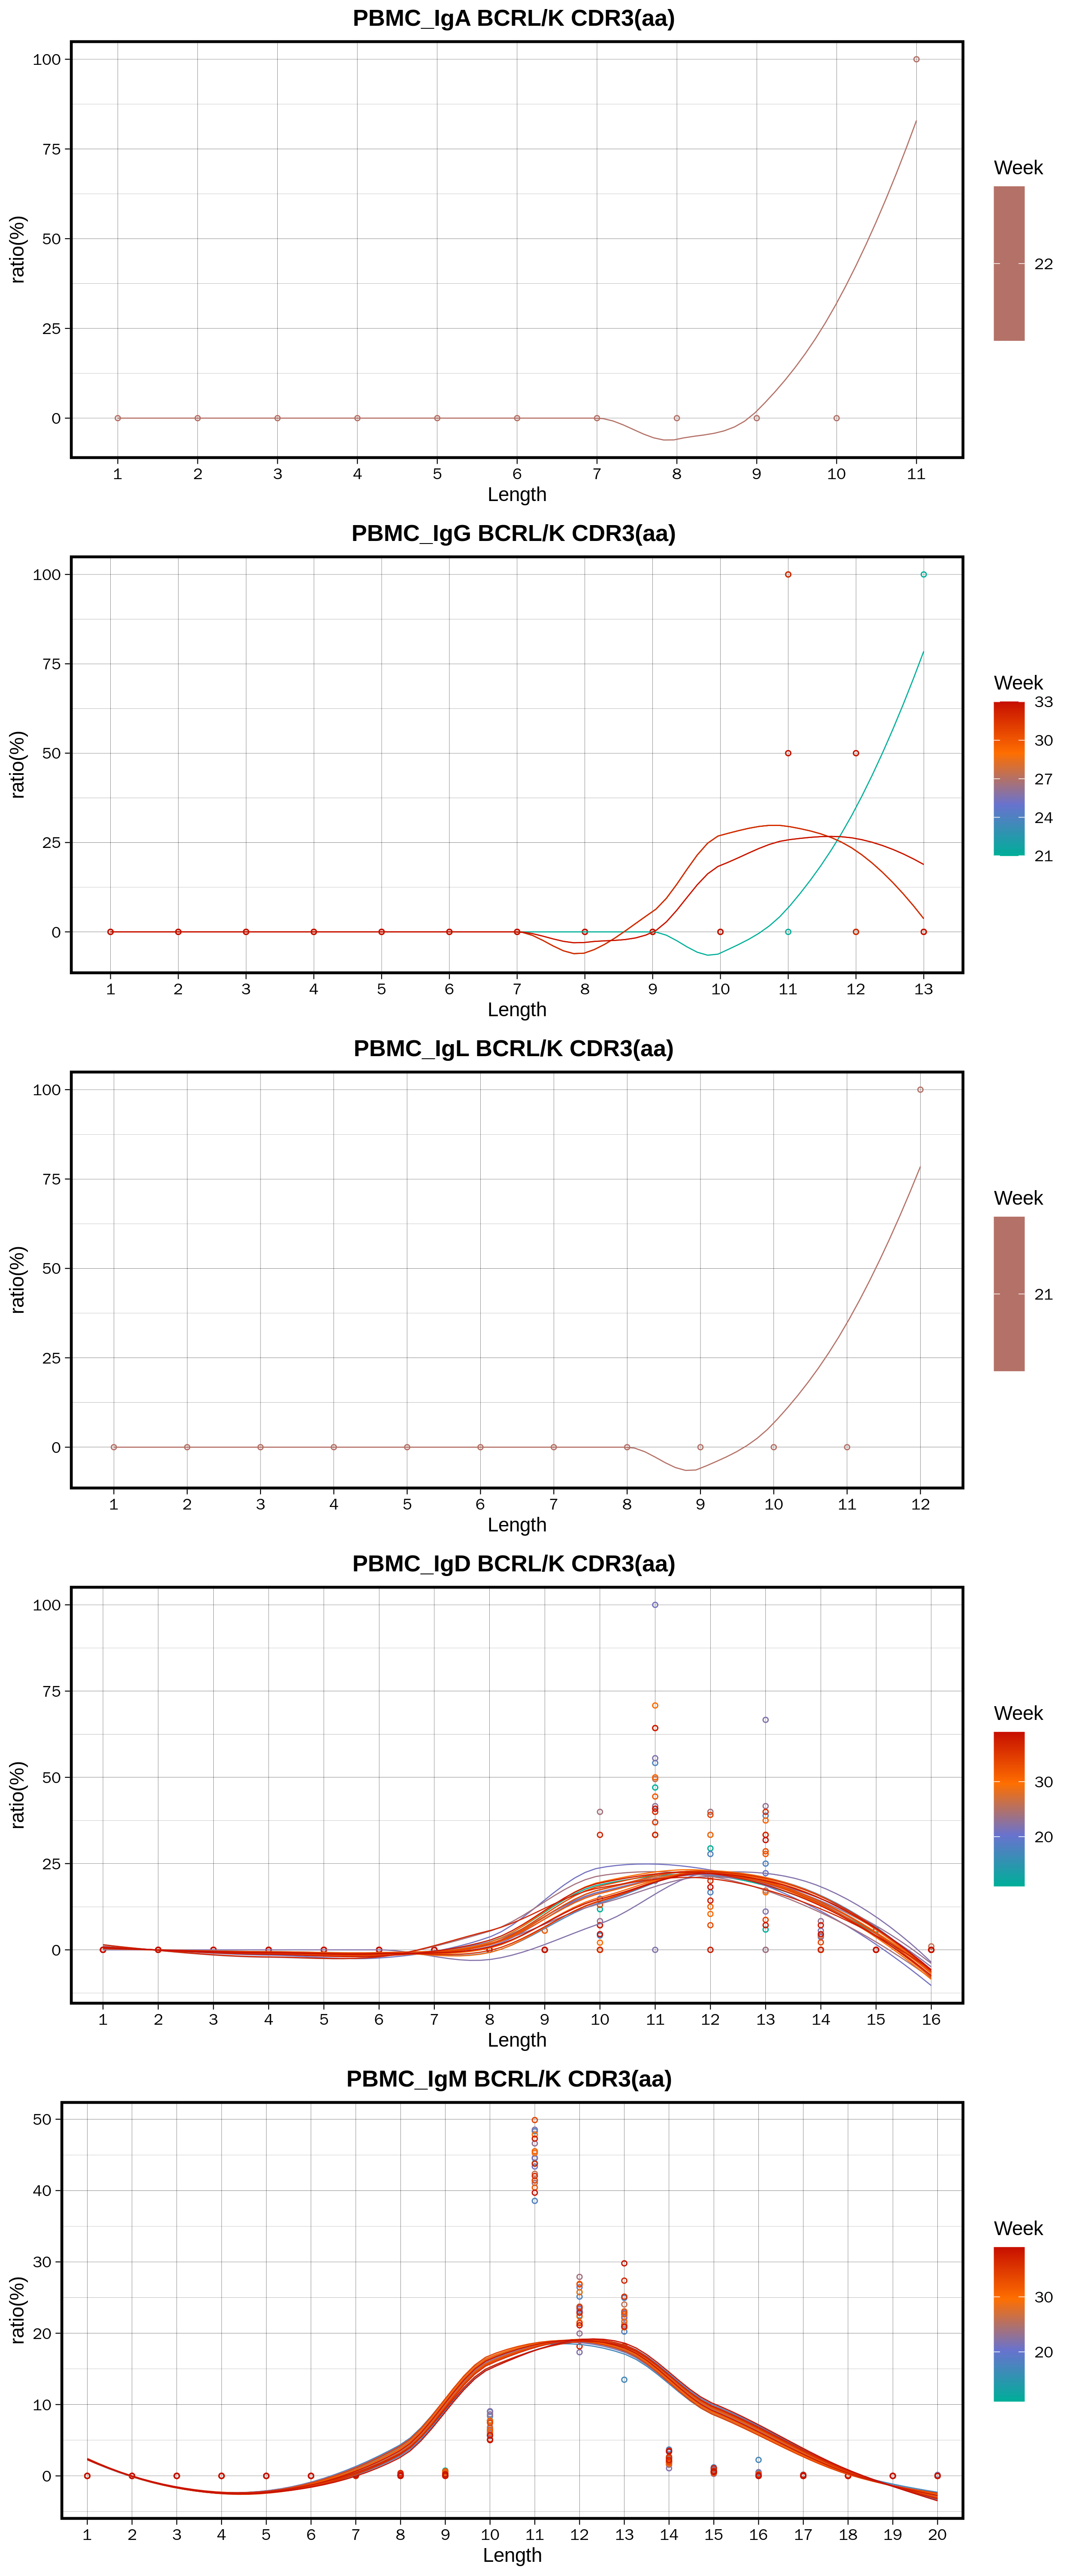

In [30]:
%%R -w 2500 -h 6000 -r 300 
library(RColorBrewer )
paths='/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdataIGL/'
BCRHplot_list=list()
for (i in c('PBMC_IgA_ratio.csv',  'PBMC_IgG_ratio.csv',  'PBMC_IgL_ratio.csv', 
'PBMC_IgD_ratio.csv',  'PBMC_IgM_ratio.csv')){
  print(i)
  name=gsub('_ratio.csv','',i)
  BCRHdata=read.csv(paste0(paths,i))
  BCRHdata<-BCRHdata[rowSums(BCRHdata)>0,]
  
  BCRHplot_list[[i]] <- plot_PBMC_sum_ratio_celltype(BCRHdata, plot_title =paste0(name,' BCRL/K CDR3(aa) '))+
    scale_color_gradientn(colours = rev(colorRampPalette(c("#C71000B2","#FF6F00B2","#6a73cf","#00AF99" ))(100)))
}
grid.arrange(grobs = BCRHplot_list, ncol = 1)  

[1] "PBMC_IgD_ratio.csv"
[1] "PBMC_IgM_ratio.csv"


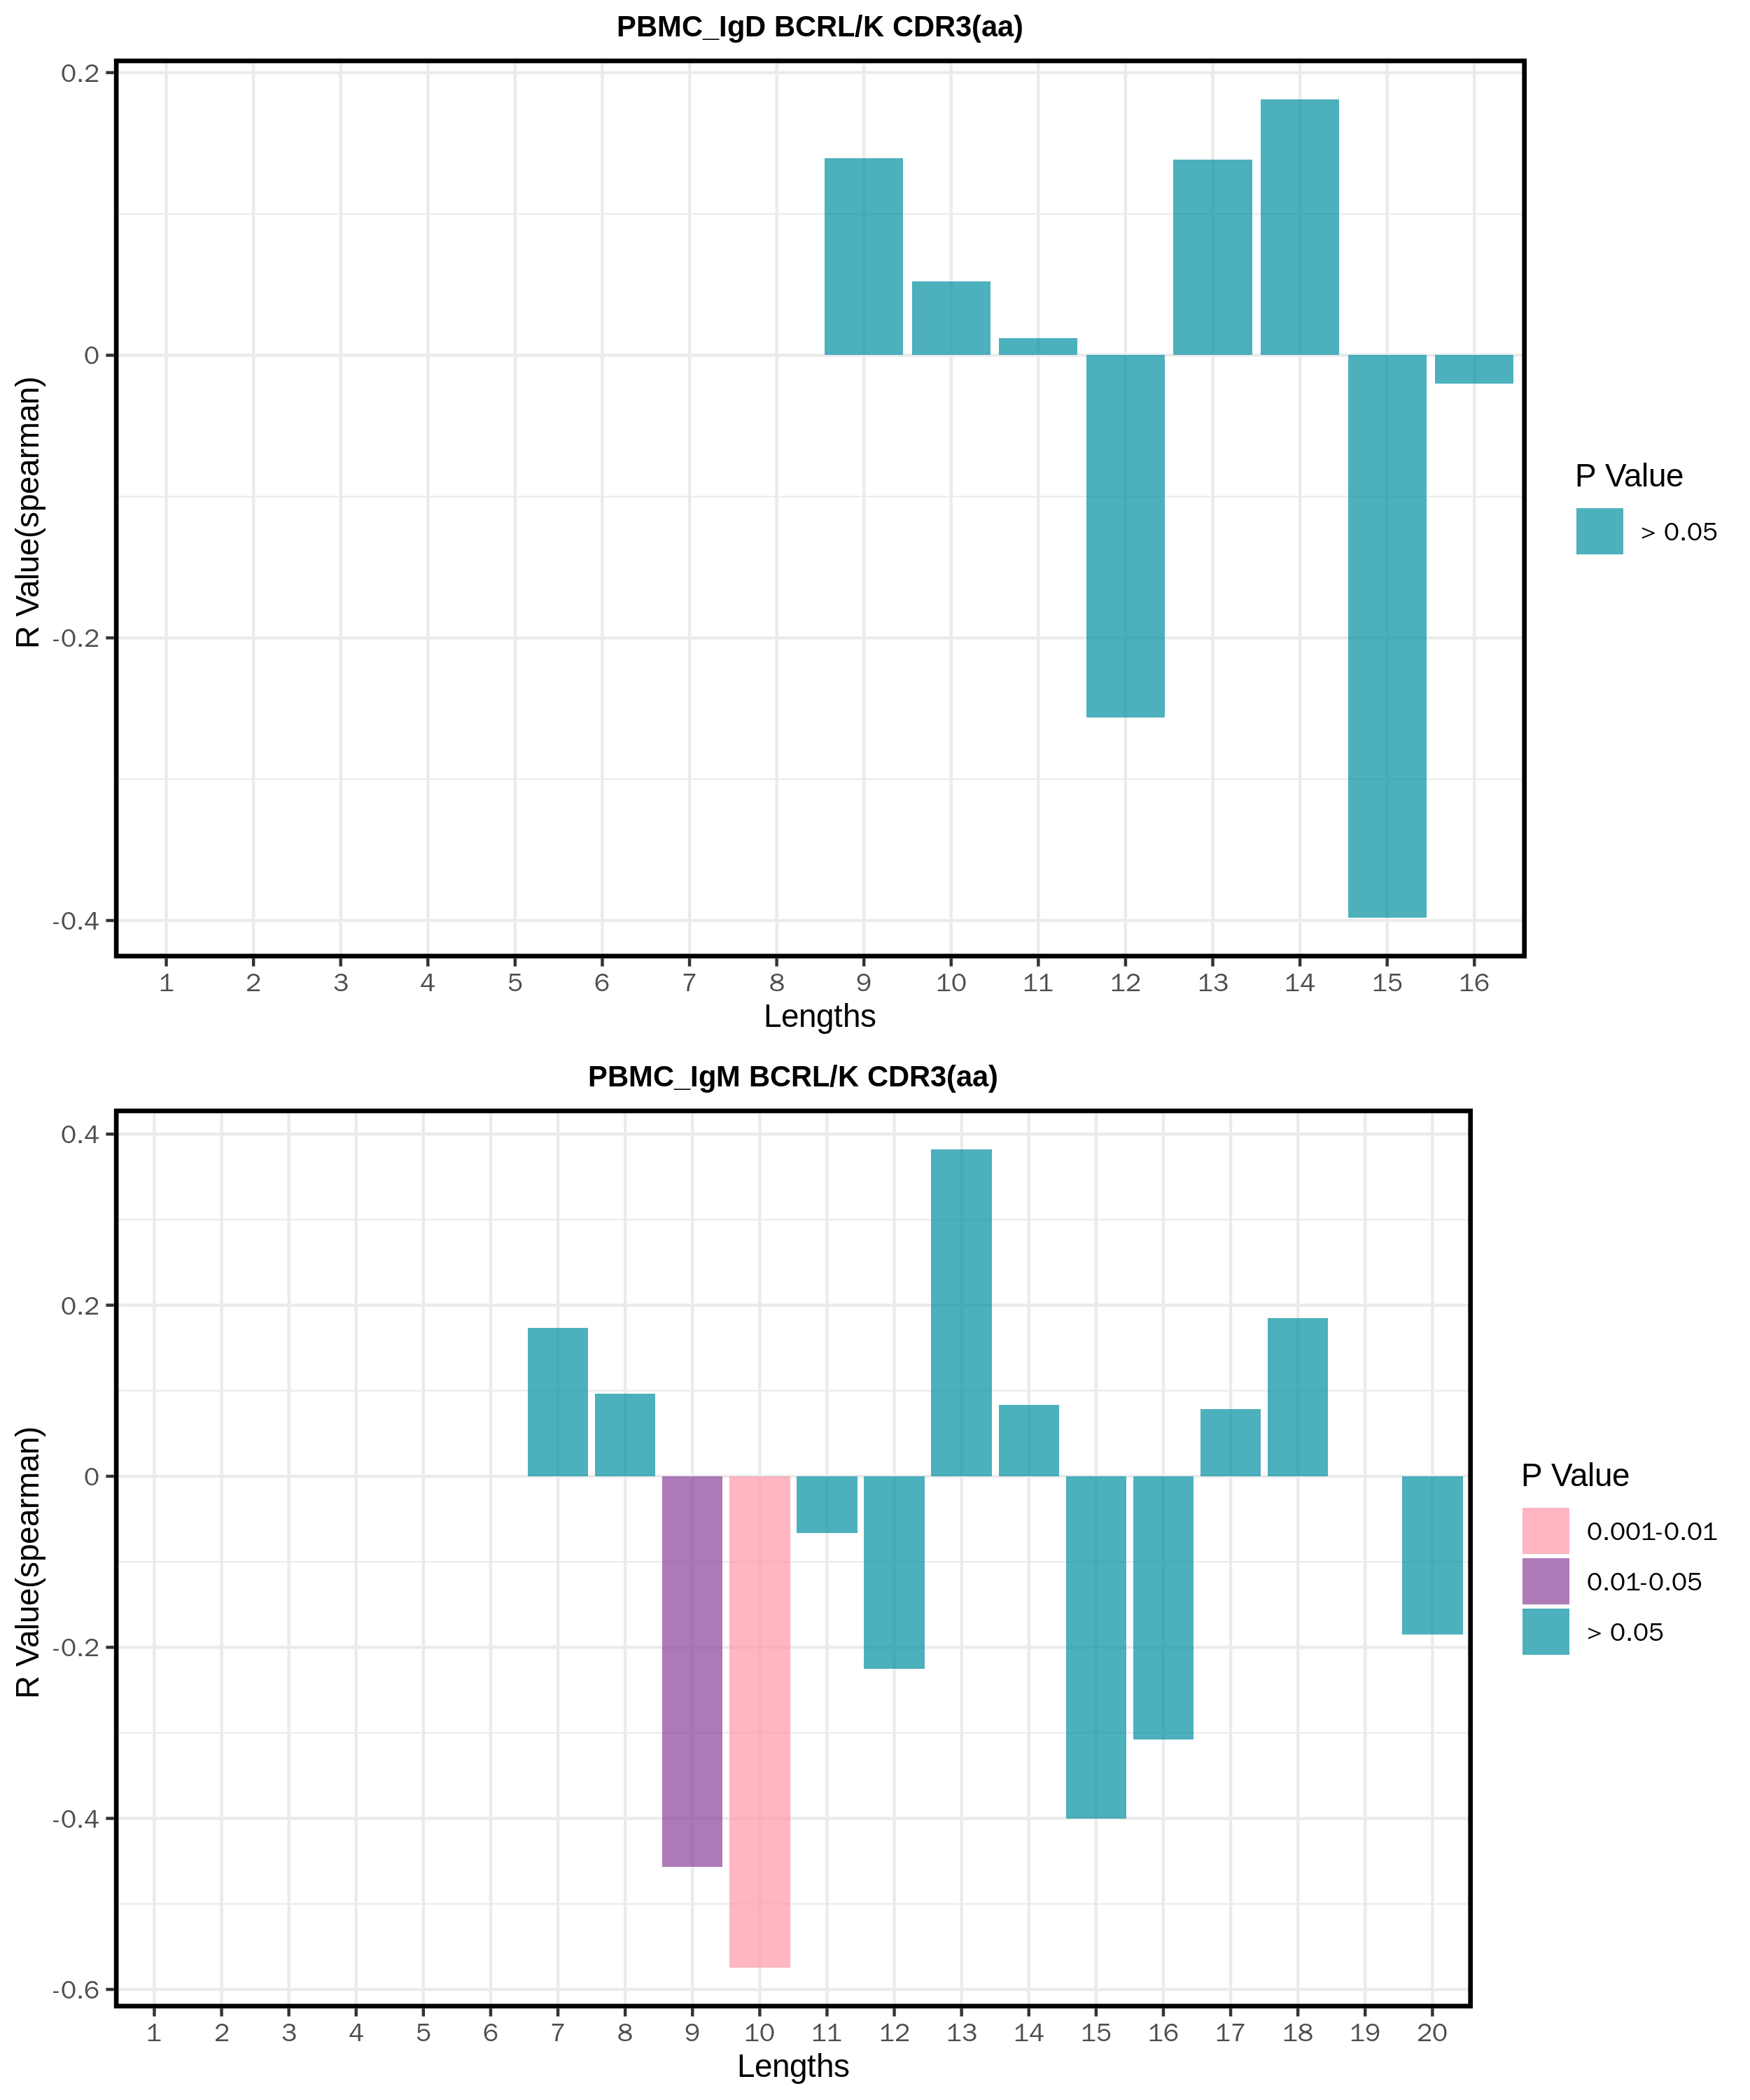

In [31]:
%%R -w 2500 -h 3000 -r 300 
# dir('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRdata/IGH/')
library(tidyverse)
library(reshape2)
library(gridExtra)
BCRHplot_pvalue <- list()
paths='/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdataIGL/'

Adatalist=c('PBMC_IgD_ratio.csv', 'PBMC_IgM_ratio.csv')
plot_list=list()
for (i in Adatalist){
  print(i)
  name=gsub('_ratio.csv','',i)
  BCRdata=read.csv(paste0(paths,i))
  BCRdata<-BCRdata[rowSums(BCRdata)>0,]
#   print(head(plot_Cell_sum_ratio_celltype(BCRdata)))
  
  BCRHtem <- plot_Cell_sum_ratio_celltype(BCRdata)
#   print(Dfcalculate_correlation(BCRHtem , "lengths", "week", "proportion"))
  BCRHtem2 <- Dfcalculate_correlation(BCRHtem , "lengths", "week", "proportion")

  BCRHtem3 <- create_pval_plot(BCRHtem2,paste0(name,' IGH'))  
#   print(BCRHtem3)
 BCRHplot_pvalue[[i]] <- create_pval_plot(BCRHtem2,paste0(name,' BCRL/K CDR3(aa)'))  
}

grid.arrange(grobs =BCRHplot_pvalue, ncol = 1)  

[1] "PBMC_IgA_ratio.csv"
[1] "PBMC_IgG_ratio.csv"
[1] "PBMC_IgD_ratio.csv"
[1] "PBMC_IgL_ratio.csv"
[1] "PBMC_IgM_ratio.csv"
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


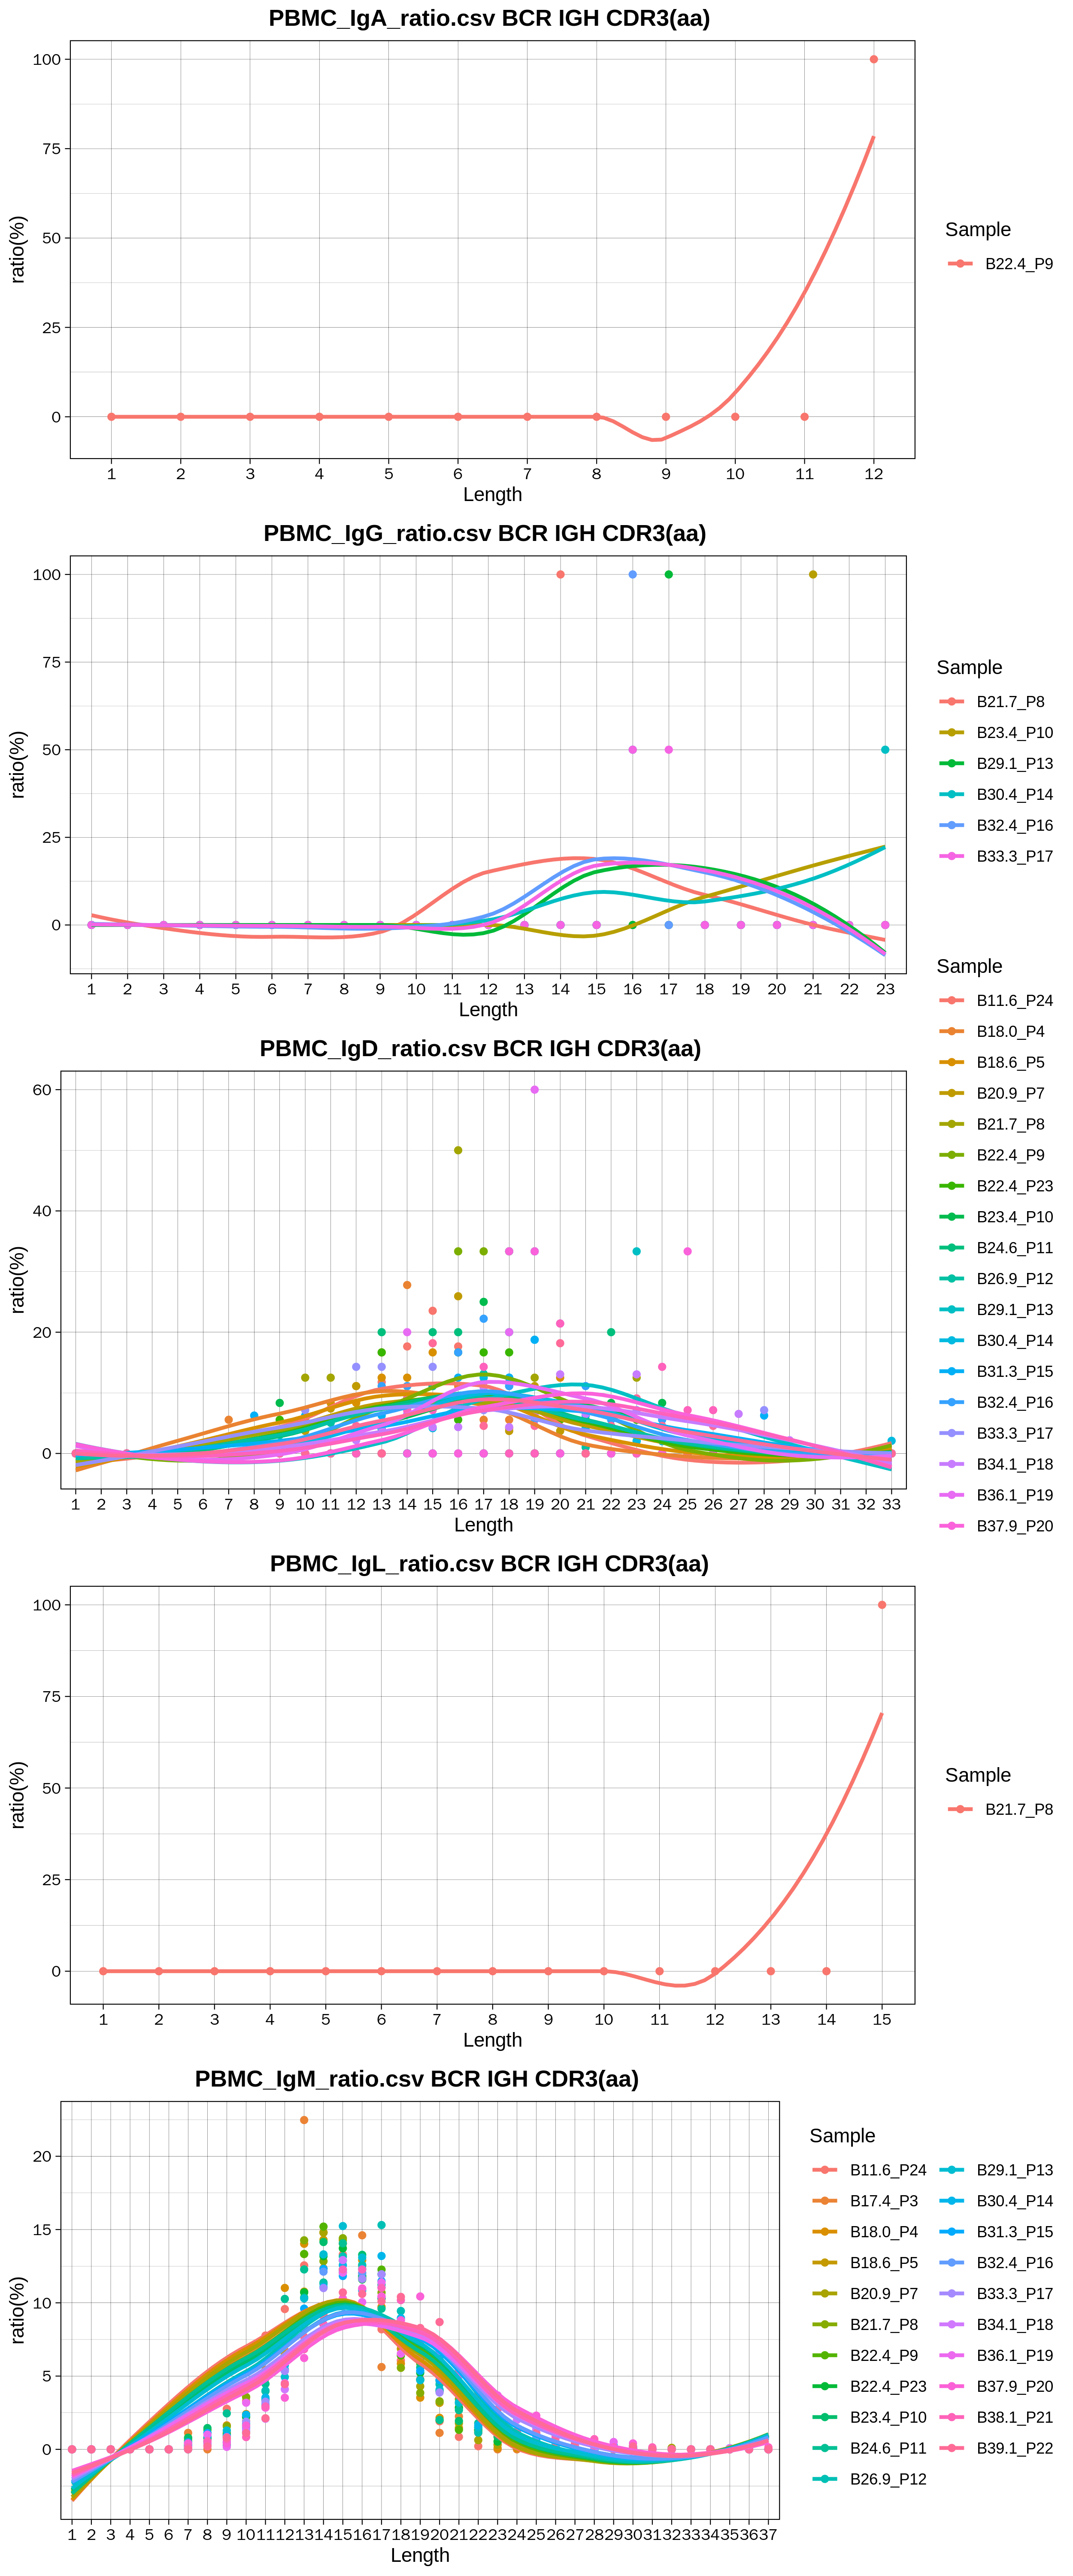

In [33]:
%%R -w 2500 -h 6000 -r 300 
# dir('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRdata/IGH/')
library(tidyverse)
library(reshape2)
library(gridExtra)
plot_PBMC_sum_ratio_celltype <- function(PBMC_dataBCR, plot_title = 'BCR IGH CDR3(aa) in PBMC') {

  PBMC_sum_ratio <- melt(PBMC_dataBCR, id = c("lengths"))
  PBMC_sum_ratio$lengths <- factor(PBMC_sum_ratio$lengths, level = unique(PBMC_sum_ratio$lengths))

  colnames(PBMC_sum_ratio) <- c('Length', 'Sample', 'ratio')
  PBMC_sum_ratio$ratio <- PBMC_sum_ratio$ratio * 100
  
  p <- ggplot(PBMC_sum_ratio) +
    geom_point(aes(Length, ratio, color = Sample)) +
    geom_smooth(aes(as.numeric(as.character(Length)), as.numeric(as.character(ratio)), color = Sample),se=F) +
    ggtitle(plot_title) +
    theme_linedraw() +
    xlab('Length') +
    ylab('ratio(%)') +
    theme(plot.title = element_text(hjust = 0.5, size = 13, face = "bold"))
  
  return(p)
}

plot_list <- list()
paths='/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdata/'
for (i in c('PBMC_IgA_ratio.csv',  'PBMC_IgG_ratio.csv', 
'PBMC_IgD_ratio.csv',  'PBMC_IgL_ratio.csv',  'PBMC_IgM_ratio.csv')){
  print(i)
  name=gsub('B_ratio.csv','',i)
  BCRdata=read.csv(paste0(paths,i))
  BCRdata<-BCRdata[rowSums(BCRdata)>0,]
  

  plot_list[[i]] <- plot_PBMC_sum_ratio_celltype(BCRdata, plot_title =paste0(name,' BCR IGH CDR3(aa) '))
}


grid.arrange(grobs = plot_list, ncol = 1)  

In [34]:
%%R
source('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/Mainrun.R')


[1] "PBMC_IgA_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgG_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgD_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgL_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
[1] "PBMC_IgM_ratio.csv"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


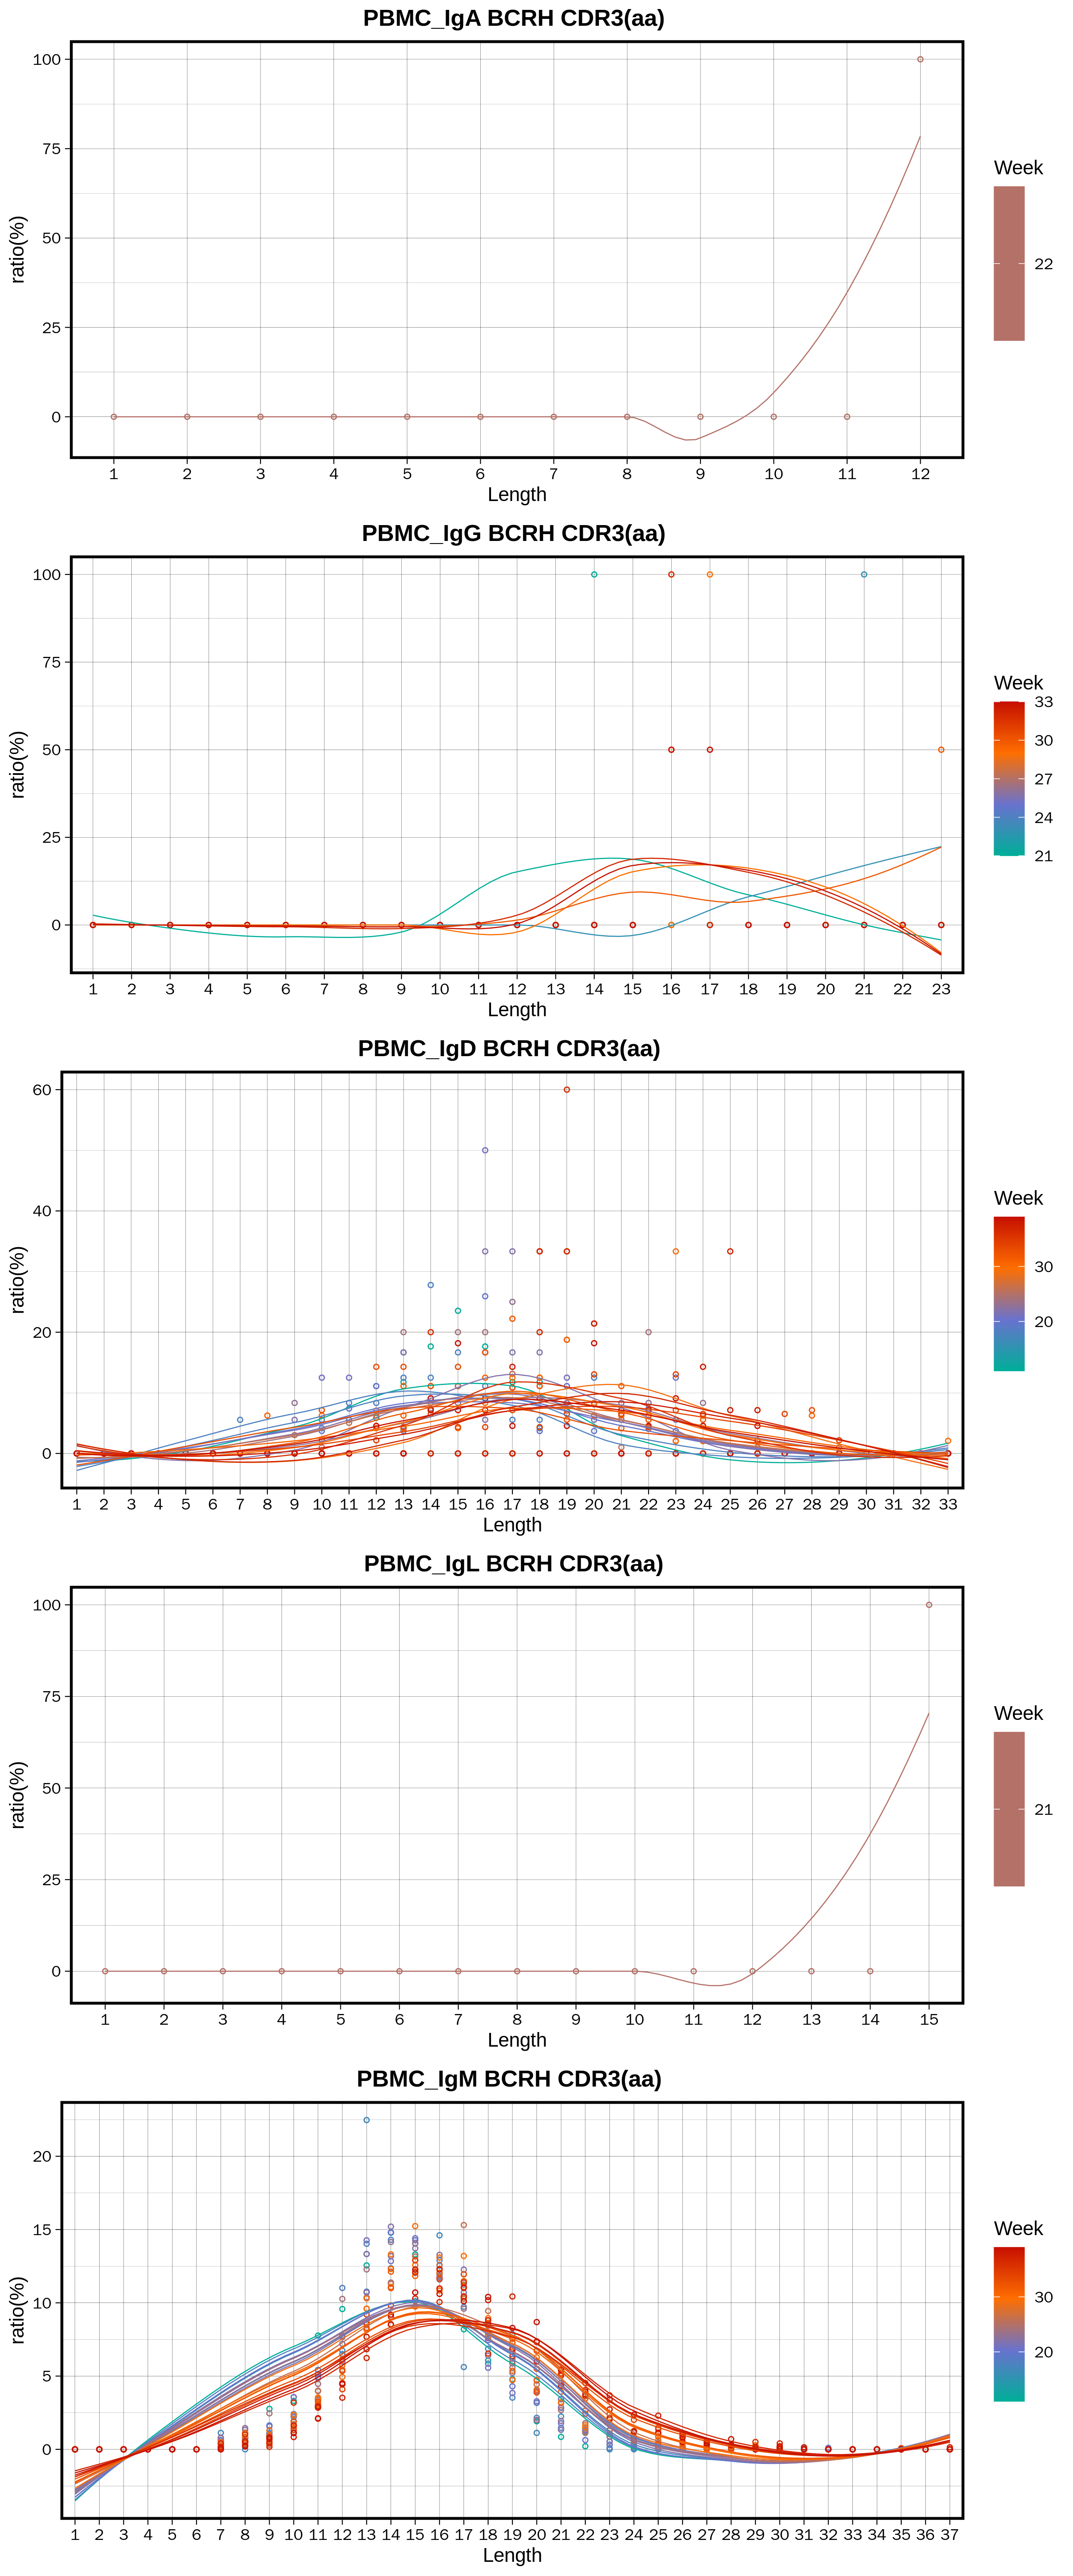

In [35]:
%%R -w 2500 -h 6000 -r 300 
library(RColorBrewer )
paths='/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdata/'
BCRHplot_list=list()
for (i in c('PBMC_IgA_ratio.csv',  'PBMC_IgG_ratio.csv', 
'PBMC_IgD_ratio.csv',  'PBMC_IgL_ratio.csv',  'PBMC_IgM_ratio.csv')){
  print(i)
  name=gsub('_ratio.csv','',i)
  BCRHdata=read.csv(paste0(paths,i))
  BCRHdata<-BCRHdata[rowSums(BCRHdata)>0,]
  

  BCRHplot_list[[i]] <- plot_PBMC_sum_ratio_celltype(BCRHdata, plot_title =paste0(name,' BCRH CDR3(aa) '))+
    scale_color_gradientn(colours = rev(colorRampPalette(c("#C71000B2","#FF6F00B2","#6a73cf","#00AF99" ))(100)))
}
grid.arrange(grobs = BCRHplot_list, ncol = 1)  

[1] "PBMC_IgD_ratio.csv"
[1] "PBMC_IgM_ratio.csv"


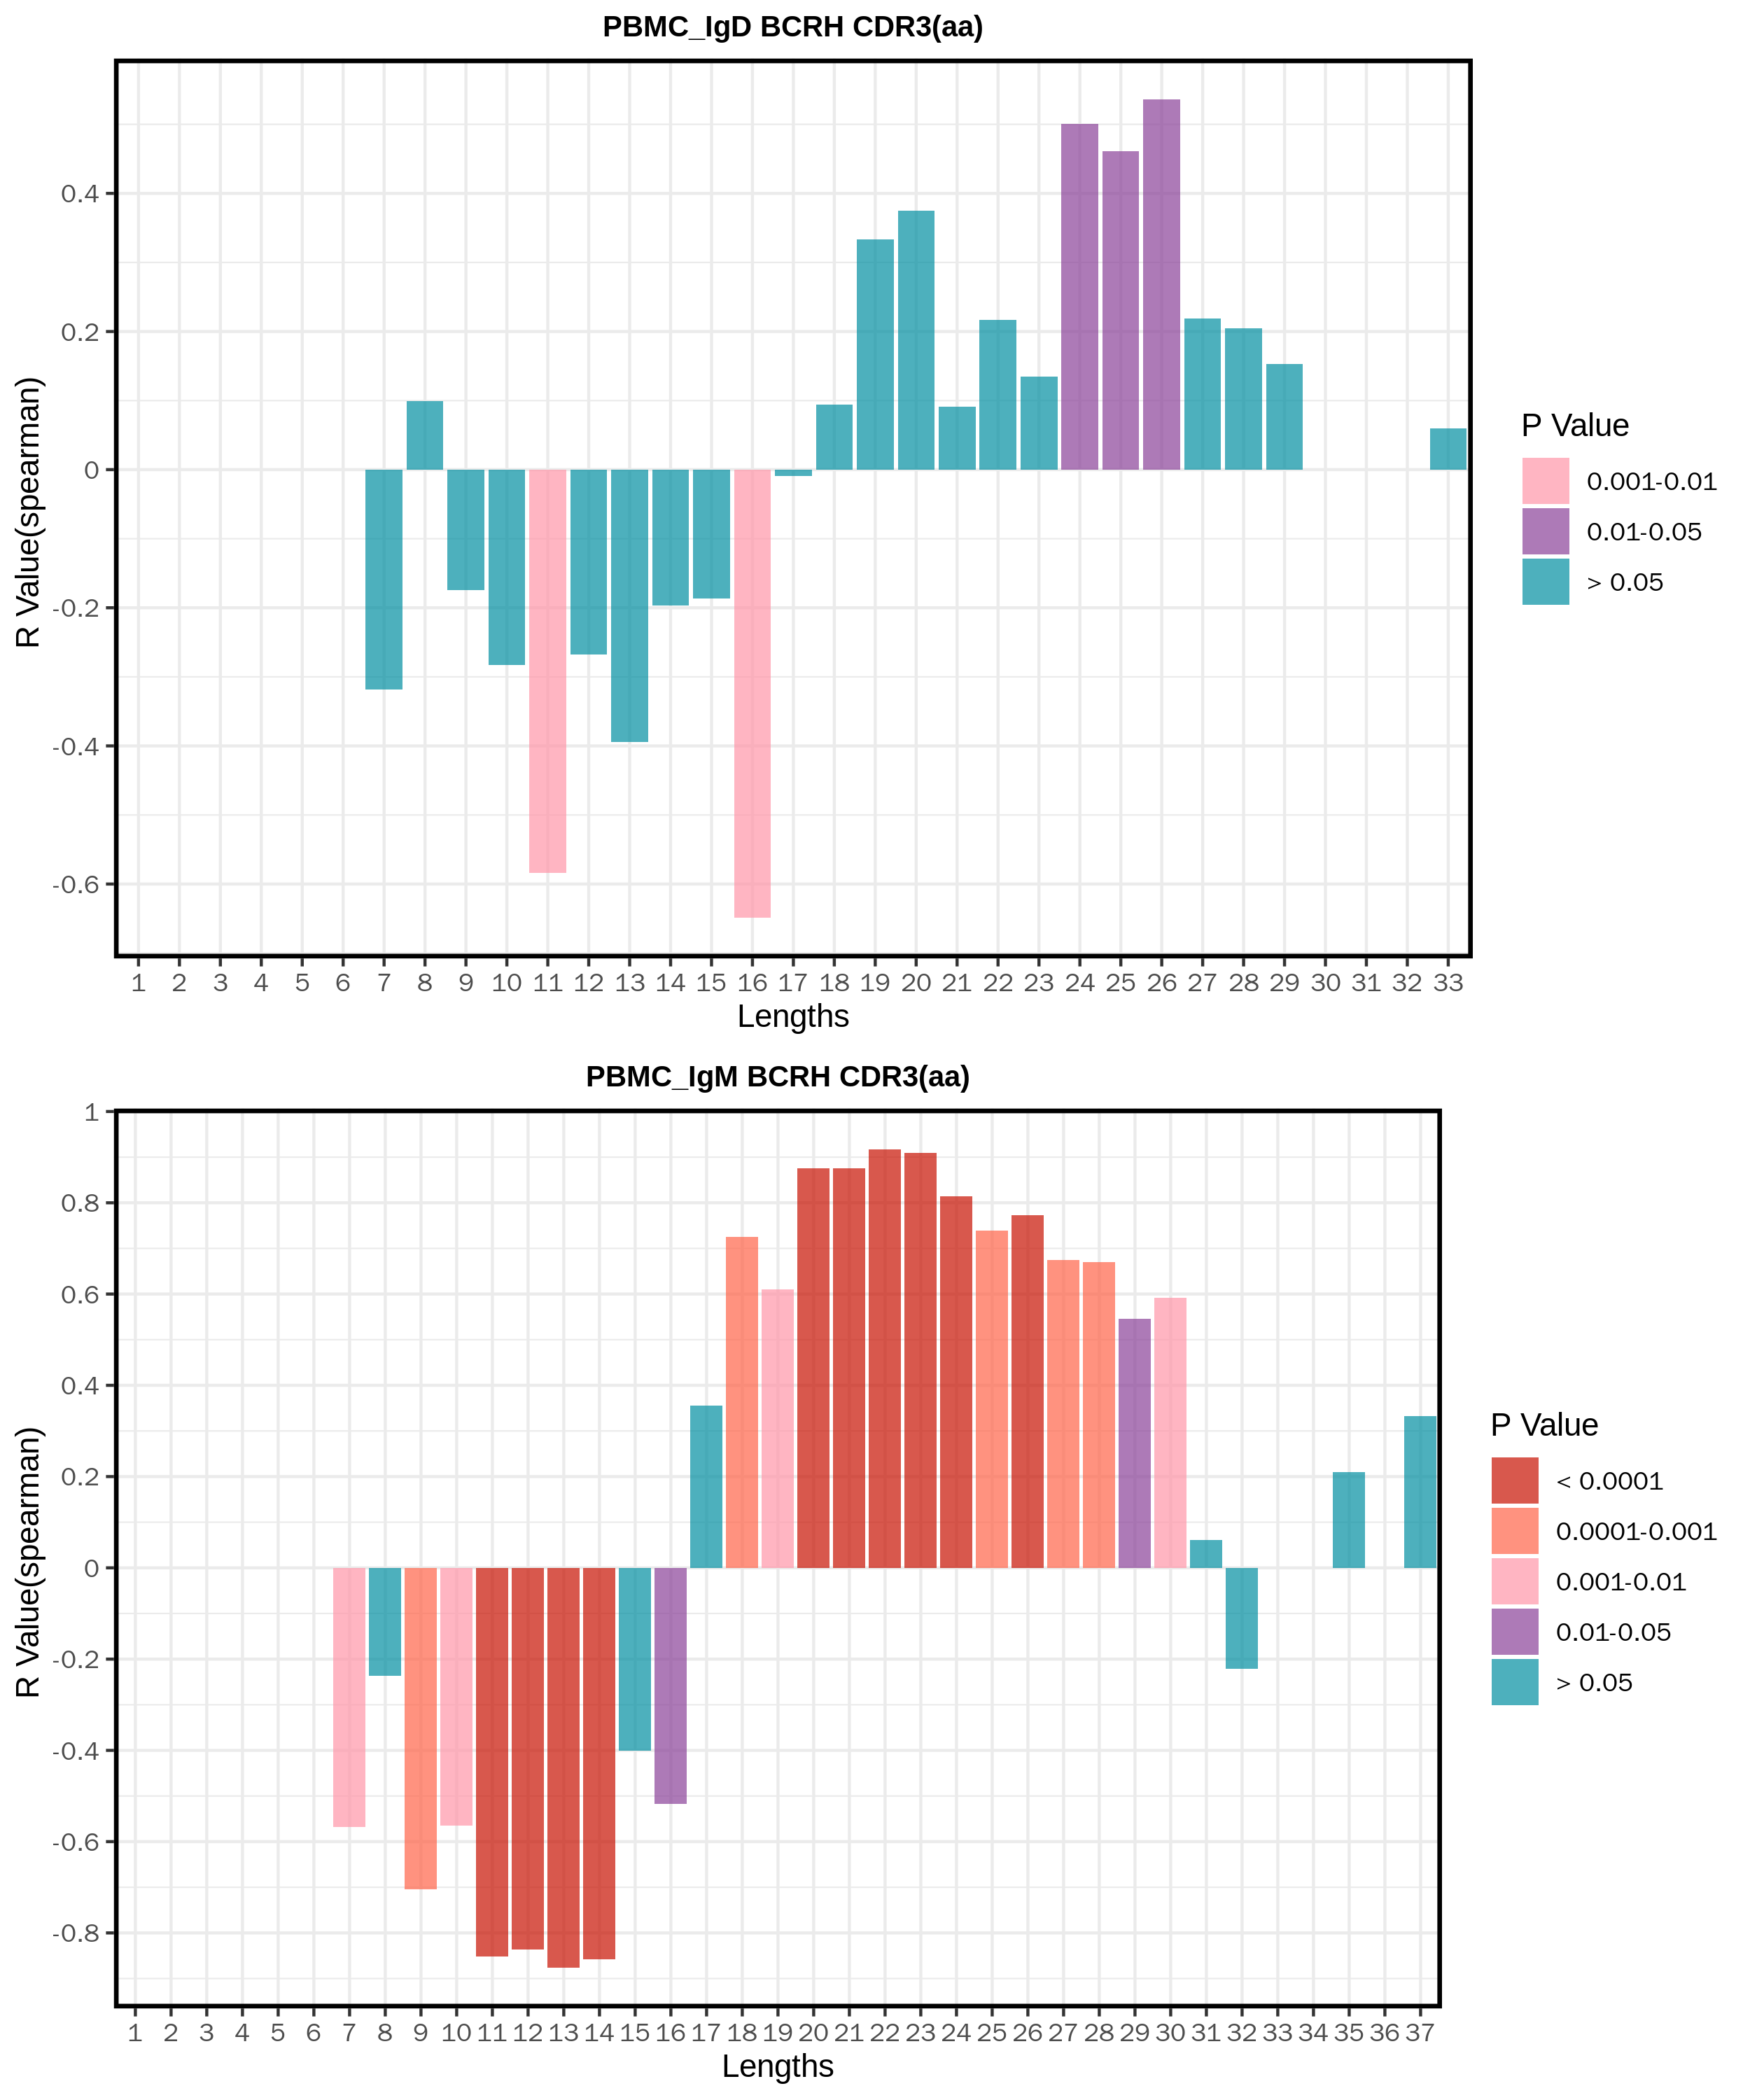

In [36]:
%%R -w 2500 -h 3000 -r 300 
# dir('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRdata/IGH/')
library(tidyverse)
library(reshape2)
library(gridExtra)
BCRHplot_pvalue <- list()
paths='/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCR_Figure/BCRISOdata/'

Adatalist=c('PBMC_IgD_ratio.csv', 'PBMC_IgM_ratio.csv')
plot_list=list()
for (i in Adatalist){
  print(i)
  name=gsub('_ratio.csv','',i)
  BCRdata=read.csv(paste0(paths,i))
  BCRdata<-BCRdata[rowSums(BCRdata)>0,]
#   print(head(plot_Cell_sum_ratio_celltype(BCRdata)))
  
  BCRHtem <- plot_Cell_sum_ratio_celltype(BCRdata)
#   print(Dfcalculate_correlation(BCRHtem , "lengths", "week", "proportion"))
  BCRHtem2 <- Dfcalculate_correlation(BCRHtem , "lengths", "week", "proportion")

  BCRHtem3 <- create_pval_plot(BCRHtem2,paste0(name,' IGH'))  
#   print(BCRHtem3)
 BCRHplot_pvalue[[i]] <- create_pval_plot(BCRHtem2,paste0(name,' BCRH CDR3(aa)'))  
}

grid.arrange(grobs =BCRHplot_pvalue, ncol = 1)  